In [108]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./input/temp2022_4.csv
./input/temp2023_4.csv


2022 자료, 2023자료 병합

In [109]:
df23=pd.read_csv('./input/temp2023_4.csv', index_col = 0)
df22=pd.read_csv('./input/temp2022_4.csv', index_col = 0)
df = pd.concat([df22,df23])
df

,home,away,home_score,away_score,home_rank,away_rank,공휴일,merged_ex_score,merged_ex_score_away,pitcher1,...,games_back,home_win_rate,3game_results,3game_evens,home_view,home_recommend,home_reply,away_view,away_recommend,away_reply
index,,,,,,,,,,,,,,,,,,,,,
0,KIA,LG,0,9,5.0,5.0,0,5.0,5.0,A. 플럿코,...,0.0,0.000000,0,0,117480.0,4843.0,662.0,19741.0,517.0,122.0
1,KT,Samsung,4,1,5.0,5.0,0,5.0,5.0,W. 쿠에바스,...,0.0,NaN,0,0,12915.0,409.0,142.0,103933.0,2048.0,429.0
2,NC,SSG,0,4,5.0,5.0,0,5.0,5.0,W. 폰트,...,0.0,NaN,0,0,40989.0,894.0,324.0,39982.0,1235.0,247.0
3,Doosan,Hanhwa,6,4,5.0,5.0,0,5.0,5.0,R. 스탁,...,0.0,NaN,0,0,33299.0,776.0,192.0,87955.0,1969.0,613.0
4,Kiwoom,Lotte,2,7,5.0,5.0,0,5.0,5.0,C. 반즈,...,0.0,NaN,0,0,26960.0,620.0,182.0,95373.0,2390.0,445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,KIA,NC,4,2,6.0,3.0,0,5.2,5.4,박준표,...,4.0,0.507143,"1, 2",0,38577.0,709.0,292.0,227293.0,9641.0,1709.0
716,Doosan,SSG,2,3,5.0,5.0,0,4.4,4.8,R. 엘리아스,...,0.5,0.528571,"1, 1",1,151862.0,4744.0,903.0,129842.0,3606.0,708.0
717,Hanhwa,Lotte,2,7,10.0,7.0,0,4.6,4.6,신정락,...,6.0,0.423358,"2, 1",0,376382.0,11882.0,2063.0,366652.0,7802.0,1530.0


데이터 타입 체크

In [110]:
df.dtypes

home                        object
away                        object
home_score                   int64
away_score                   int64
home_rank                  float64
away_rank                  float64
공휴일                          int64
merged_ex_score            float64
merged_ex_score_away       float64
pitcher1                    object
pitcher2                    object
time                        object
요일                          object
구장                          object
관중수                          int64
month                        int64
year                         int64
first_game                   int64
rain                       float64
temp                       float64
pm10                       float64
date                         int64
before_attendance          float64
before_5game_avg           float64
last_match                  object
pythagorean_expectation    float64
games_back                 float64
home_win_rate              float64
3game_results       

null 값 가진 자료 확인

In [111]:
df.isnull().sum()

home                       0
away                       0
home_score                 0
away_score                 0
home_rank                  0
away_rank                  0
공휴일                        0
merged_ex_score            0
merged_ex_score_away       0
pitcher1                   2
pitcher2                   4
time                       0
요일                         0
구장                         0
관중수                        0
month                      0
year                       0
first_game                 0
rain                       0
temp                       0
pm10                       0
date                       0
before_attendance          0
before_5game_avg           0
last_match                 0
pythagorean_expectation    0
games_back                 0
home_win_rate              8
3game_results              0
3game_evens                0
home_view                  0
home_recommend             0
home_reply                 0
away_view                  0
away_recommend

null 값 가진 자료 drop

In [112]:
df =df.dropna()

불필요 요인 삭제
    구장 : 어차피 홈팀과 1대1 매치됨.
    home_score : 당일 획득 점수는 당일 관중수 예측에 사용되면 안됨.
    away_score : 당일 획득 점수는 당일 관중수 예측에 사용되면 안됨.
    pitcher1 : 투수가 너무 많은 관계로 차원이 너무 커짐.
    pitcher2 : 투수가 너무 많은 관계로 차원이 너무 커짐.
    date : 년, 월, 요일로 쪼개어서 나타냄.

요인 이름 변경
    모델 사용의 편의를 위해 영어 이름으로 변경

In [113]:
df = df.drop(columns=['구장', 'home_score','away_score', 'pitcher1', 'pitcher2', 'date'])
new_column_names = {'공휴일': 'holiday', '관중수': 'attendance', '요일':'day'}
df.rename(columns=new_column_names, inplace=True)

요인 타입 변경. 숫자 -> 오브젝트

In [114]:
to_object = ['home_rank', 'away_rank', 'holiday', 'month', 'year', 'first_game', '3game_evens']
for i in to_object:
    df[i] = df[i].astype('object')
df

,home,away,home_rank,away_rank,holiday,merged_ex_score,merged_ex_score_away,time,day,attendance,...,games_back,home_win_rate,3game_results,3game_evens,home_view,home_recommend,home_reply,away_view,away_recommend,away_reply
index,,,,,,,,,,,,,,,,,,,,,
0,KIA,LG,5.0,5.0,0,5.0,5.0,14:00,토,16908,...,0.0,0.000000,0,0,117480.0,4843.0,662.0,19741.0,517.0,122.0
5,KIA,LG,6.0,1.0,0,5.0,5.0,14:00,일,10290,...,1.0,0.000000,0,0,156978.0,5146.0,689.0,150863.0,4799.0,879.0
6,KT,Samsung,1.0,6.0,0,5.0,5.0,14:00,일,10321,...,1.0,1.000000,0,0,36366.0,1200.0,264.0,123156.0,3124.0,685.0
7,NC,SSG,6.0,1.0,0,5.0,5.0,14:00,일,4808,...,1.0,0.000000,0,0,123266.0,2821.0,491.0,220057.0,7591.0,1155.0
8,Doosan,Hanhwa,1.0,6.0,0,5.0,5.0,14:00,일,11345,...,1.0,1.000000,0,0,178209.0,6173.0,827.0,147116.0,3738.0,816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,KIA,NC,6.0,3.0,0,5.2,5.4,18:30,월,5251,...,4.0,0.507143,"1, 2",0,38577.0,709.0,292.0,227293.0,9641.0,1709.0
716,Doosan,SSG,5.0,5.0,0,4.4,4.8,18:30,월,15850,...,0.5,0.528571,"1, 1",1,151862.0,4744.0,903.0,129842.0,3606.0,708.0
717,Hanhwa,Lotte,10.0,7.0,0,4.6,4.6,18:30,월,12000,...,6.0,0.423358,"2, 1",0,376382.0,11882.0,2063.0,366652.0,7802.0,1530.0


선형 회귀 분석 모델 함수

In [115]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def get_result(df):
    y = df['attendance']
    x = df.drop(columns = 'attendance')
    
    x_dummies = pd.get_dummies(x, drop_first=True)

    scaler = MinMaxScaler()
    X = scaler.fit_transform(x_dummies)
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=10)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    
    # return metrics.mean_squared_error(y_test,preds,squared=False)
    return metrics.root_mean_squared_error(y_test,preds,)

선형 회귀 분석 모델 함수 2 (r-square 값 포함)

In [116]:
def get_result_r(df):
    y = df['attendance']
    x = df.drop(columns = 'attendance')
    
    x_dummies = pd.get_dummies(x, drop_first=True)

    scaler = MinMaxScaler()
    X = scaler.fit_transform(x_dummies)
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    # Get R-squared value on the test set
    r_squared = model.score(X_test, y_test)
    rmse = metrics.mean_squared_error(y_test,preds,squared=False)
    n = X_test.shape[0]  # Number of samples
    k = X_test.shape[1]  # Number of features

    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))

    print(f'Adjusted R-squared value: {adjusted_r_squared}')
    print(f'R-squared value: {r_squared}')
    print(f'Root mean square error: {rmse}')
    
    
#     return metrics.mean_squared_error(y_test,preds,squared=False)

숫자 데이터와 오브젝트 데이터 구분  
    숫자 데이터 p-value 검증 위함

In [117]:
numerics1 = []
objects = []
for i, d in df.dtypes.items():
    if d == 'object':
        objects.append(i)
    else:
        numerics1.append(i)

숫자 데이터만 포함해 데이터셋 구성

In [118]:
#all of numeric data
df_numerics1 = df[numerics1]


p-value 검증을 통한 요인 걸러내기

In [119]:
# numeric data p value 검증
from scipy.stats import pearsonr

numerics2 = []

# Selecting only the features (independent variables)
features = df_numerics1.drop('attendance', axis=1)

# Loop through each feature and calculate correlation and p-value
for column in features.columns:
    correlation, p_value = pearsonr(df_numerics1[column], df_numerics1['attendance'])
    # Check if the p-value is greater than 0.05
    if p_value > 0.05:
        print(f"Feature '{column}' has a p-value of {p_value}, trash.")
#         df = df.drop(column, axis=1)
    else:
        print(f"Feature '{column}' has a p-value of {p_value}, good.")
        numerics2.append(column)

Feature 'merged_ex_score' has a p-value of 0.0003009710179228288, good.
Feature 'merged_ex_score_away' has a p-value of 0.009892353101095519, good.
Feature 'rain' has a p-value of 1.3165794843502677e-05, good.
Feature 'temp' has a p-value of 0.6266074519628417, trash.
Feature 'pm10' has a p-value of 0.5154697122533395, trash.
Feature 'before_attendance' has a p-value of 3.224658751239926e-161, good.
Feature 'before_5game_avg' has a p-value of 3.132546080729365e-100, good.
Feature 'pythagorean_expectation' has a p-value of 9.404580999563299e-32, good.
Feature 'games_back' has a p-value of 0.6375744619497623, trash.
Feature 'home_win_rate' has a p-value of 1.448622006533958e-35, good.
Feature 'home_view' has a p-value of 1.0163527853601698e-13, good.
Feature 'home_recommend' has a p-value of 5.0359241501977525e-12, good.
Feature 'home_reply' has a p-value of 7.542132873324393e-10, good.
Feature 'away_view' has a p-value of 2.952029663733011e-18, good.
Feature 'away_recommend' has a p-val

p검증 통과 숫자 요인들만 포함한 df 만들기

In [120]:
numerics2.append('attendance')
df_numerics2 = df[numerics2]

요인간 상관관계 필터

In [121]:
correlation_matrix = df_numerics2.corr()
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
numerics3 = list(set(numerics2)-set(correlated_features))
df_numerics3 = df[numerics3]

필터를 통해 걸러진 요인과 남은 요인 확인 가능
    p value 검증 필터
        걸러진 것 : games_back, pm10, temp
    상관관계 필터
        걸러진 것 : away_recommend, away_reply, home_recommend, home_reply, home_win_rate, 

In [122]:
print(df_numerics1.columns.sort_values())
print(df_numerics2.columns.sort_values())
print(df_numerics3.columns.sort_values())

Index(['attendance', 'away_recommend', 'away_reply', 'away_view',
       'before_5game_avg', 'before_attendance', 'games_back', 'home_recommend',
       'home_reply', 'home_view', 'home_win_rate', 'merged_ex_score',
       'merged_ex_score_away', 'pm10', 'pythagorean_expectation', 'rain',
       'temp'],
      dtype='object')
Index(['attendance', 'away_recommend', 'away_reply', 'away_view',
       'before_5game_avg', 'before_attendance', 'home_recommend', 'home_reply',
       'home_view', 'home_win_rate', 'merged_ex_score', 'merged_ex_score_away',
       'pythagorean_expectation', 'rain'],
      dtype='object')
Index(['attendance', 'away_view', 'before_5game_avg', 'before_attendance',
       'home_view', 'merged_ex_score', 'merged_ex_score_away',
       'pythagorean_expectation', 'rain'],
      dtype='object')


각 숫자 데이터 셋 성능 비교

In [123]:
print(get_result(df_numerics1))
print(get_result(df_numerics2))
print(get_result(df_numerics3))

3707.001030839726
3703.9934643885017
3740.0113716863416


숫자 데이터, 오브젝트 데이터 병합
병합한 모델 성능 평가

In [124]:
total = list(set(numerics3 + objects))
df_total = df[total]
print(get_result(df_total))
(get_result_r(df_total))
# total
# print(total)

2466.2582042081954
Adjusted R-squared value: 0.7172466186575165
R-squared value: 0.789671168966293
Root mean square error: 2441.4385014861964


/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


요인 하나씩 제거한 데이터셋 만들어서 성능 비교
    예를들어 22가지 요인 중 rain 하나만 제거, 원래 오리지널 rmse인 2441과 비교하여 rmse가 올랐는지 내렸는지를 보고 요인이 성능에 긍정적인 기여를 하는지 판단함. original - new가 음수이면 긍정적인 기여, 양수이면 부정적인 기여.

In [125]:
original = 2441.44
print(len(total))

dic = {}
for i in total:
    if i != 'attendance':
        dic[i] = total.copy()  # Create a copy of the total list for each key
        dic[i].remove(i)

dic2 = {}
for i in dic:
    df_temp = df[dic[i]]
    new = get_result(df_temp)
    print(i, original - new)
    print(i, new/original)
    dic2[i] = original - new

22
year -44.54087460906385
year 1.0182436900391014
before_attendance -276.1704914846259
before_attendance 1.1131178695706738
before_5game_avg -27.644577711793318
before_5game_avg 1.0113230625007346
home -225.63011695672276
home 1.092416818335377
merged_ex_score -24.719629831469774
merged_ex_score 1.010125020410688
away_view -26.322030701011954
away_view 1.0107813547336866
merged_ex_score_away -32.06598916697112
merged_ex_score_away 1.0131340475977173
pythagorean_expectation -24.130595788917162
pythagorean_expectation 1.0098837554021058
time -60.629905703785425
time 1.0248336660756707
month -30.67499209670723
month 1.0125643030738856
last_match -29.008435371203177
last_match 1.0118816908755501
away -152.4286183490135
away 1.0624338989895363
home_rank -41.77829826729976
home_rank 1.0171121544118633
holiday -26.356086660174242
holiday 1.0107953038617268
day -462.1359124923092
day 1.1892882530360398
first_game -33.83276596245878
first_game 1.013857709369249
3game_results -9.023049804216953

요인 중요도, 큰 음수일 수록 높은 중요도.

day: -462.1359124923092
before_attendance: -276.1704914846259
home: -225.63011695672276
away: -152.4286183490135
time: -60.629905703785425
home_view: -55.66390308500195
year: -44.54087460906385
home_rank: -41.77829826729976
first_game: -33.83276596245878
away_rank: -32.818914892300654
merged_ex_score_away: -32.06598916697112
month: -30.67499209670723
last_match: -29.008435371203177
before_5game_avg: -27.644577711793318
holiday: -26.356086660174242
away_view: -26.322030701011954
3game_evens: -24.865940418864284
merged_ex_score: -24.719629831469774
pythagorean_expectation: -24.130595788917162
rain: -23.794402996833014
3game_results: -9.023049804216953


/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/205489736.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_scores, x=features, palette="viridis")


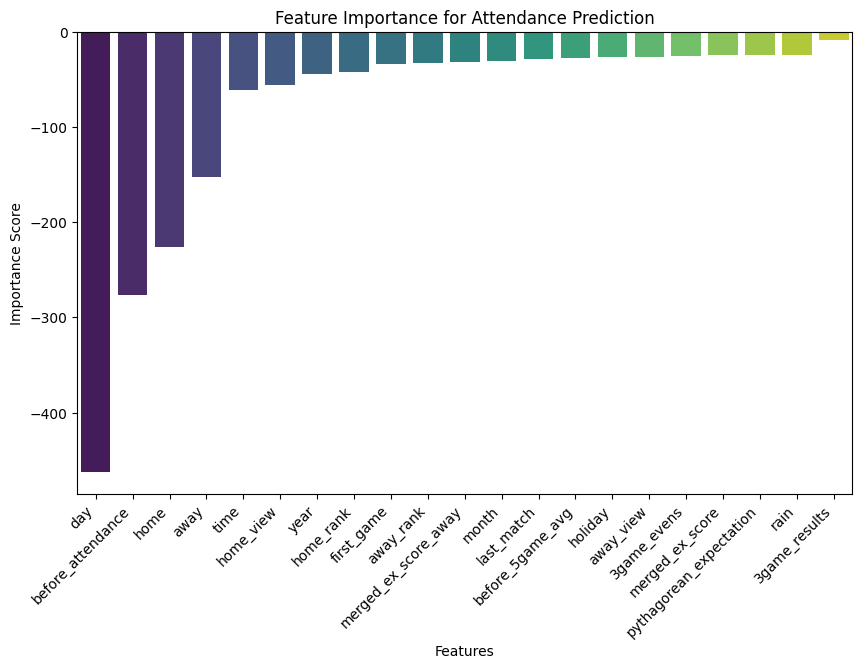

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sorting the dictionary by values
dic2 = dict(sorted(dic2.items(), key=lambda item: item[1]))

# Displaying the sorted dictionary
temp1 = []
temp2 = []
for key, value in dic2.items():
    print(f"{key}: {value}")
    temp1.append(key)
    temp2.append(value)


def show2(list1, list2):
    features = list1
    importance_scores = list2
    plt.figure(figsize=(10, 6))
    sns.barplot(y=importance_scores, x=features, palette="viridis")
    plt.title(f"Feature Importance for Attendance Prediction")
    plt.ylabel("Importance Score")
    plt.xlabel("Features")
    plt.xticks(rotation=45, ha='right') 
    plt.show()
show2(temp1, temp2)

팀별 평가

In [127]:
grouped = df.groupby('home')
for i in grouped:
    df_temp = i[1][total]
    original = get_result(df_temp)
    print(f'team : {i[0]},\noriginal rmse : {original}')
    dic2 = {}
    for l in dic:
        df_temp = i[1][dic[l]]
        new = get_result(df_temp)
        dic2[l] = original - new
    # Sorting the dictionary by values
    dic2 = dict(sorted(dic2.items(), key=lambda item: item[1]))

    # Displaying the sorted dictionary
    for key, value in dic2.items():
        print(f"{key}: {value}")
    print(' ')

team : Doosan,
original rmse : 4607.733671542835
holiday: -211.52342406769276
3game_results: -174.04666043597263
home_view: -123.3201473392819
month: -108.06949474915746
year: -61.81260847811882
away: -44.17304363682251
3game_evens: -9.094947017729282e-13
home: 0.0
first_game: 0.0
merged_ex_score_away: 3.5015314118154492
merged_ex_score: 77.90526752858659
time: 154.7504894099975
last_match: 213.12560779124033
before_attendance: 222.28456706715497
home_rank: 319.63771323939727
rain: 327.92761973488086
pythagorean_expectation: 353.7788051861153
before_5game_avg: 389.9762506935185
away_view: 430.6467193830904
away_rank: 616.1812367212165
day: 1117.8628407765364
 
team : Hanhwa,
original rmse : 811059689114859.8
pythagorean_expectation: -2.250031102001365e+16
3game_evens: -7230430125616027.0
merged_ex_score_away: -6712413233289705.0
home_view: -6009215379361521.0
year: -4554014137154459.0
merged_ex_score: -4157897431973347.0
before_attendance: -3059973628358310.0
holiday: -2291378901575634

??

In [128]:
temp = list(dic2)
temp2 = []
for i in dic2:
    temp2.append(dic2[i])
print(temp)
print(temp2)

['day', 'year', 'away_rank', 'away_view', 'pythagorean_expectation', 'merged_ex_score_away', 'away', '3game_evens', 'home', 'first_game', 'last_match', '3game_results', 'holiday', 'rain', 'before_5game_avg', 'home_view', 'merged_ex_score', 'time', 'home_rank', 'before_attendance', 'month']
[-684.0381661546076, -256.67019857592686, -235.94309452785865, -94.854472605904, -90.18802824194245, -77.88176776346154, -45.767256398750305, -2.2737367544323206e-12, 0.0, 0.0, 51.73241465081537, 55.86199837475169, 58.527949244784395, 65.04996651824831, 70.71453374701014, 100.93610655815564, 139.74604794197967, 155.9966605285258, 180.15492804317137, 189.7182624943298, 651.5638696933029]


??

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Assuming you have a list of features and their importance scores
# features = temp
# importance_scores = temp2
# print(features)
# print(importance_scores)
# # Creating a bar chart
# plt.figure(figsize=(10, 6))
# sns.barplot(y=importance_scores, x=features, palette="viridis")
# plt.title("Feature Importance for Attendance Prediction")
# plt.ylabel("Importance Score")
# plt.xlabel("Features")
# plt.xticks(rotation=45, ha='right') 
# plt.show()


def show(team, list1, list2):
    features = list1
    importance_scores = list2
#     print(features)
#     print(importance_scores)
    # Creating a bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(y=importance_scores, x=features, palette="viridis")
    plt.title(f"Feature Importance for {team}")
    plt.ylabel("Importance Score")
    plt.xlabel("Features")
    plt.xticks(rotation=45, ha='right') 
    plt.show()

요일 영어로 변경

In [ ]:
# Mapping Korean to English values
korean_to_english_mapping = {
    '월': 'Mon',
    '화': 'Tue',
    '수': 'Wed',
    '목': 'Thu',
    '금': 'Fri',
    '토': 'Sat',
    '일': 'Sun'
}

# Replace values in the 'day' column
df['day'] = df['day'].replace(korean_to_english_mapping)

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/4274025000.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='attendance', data=df, palette='viridis')
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

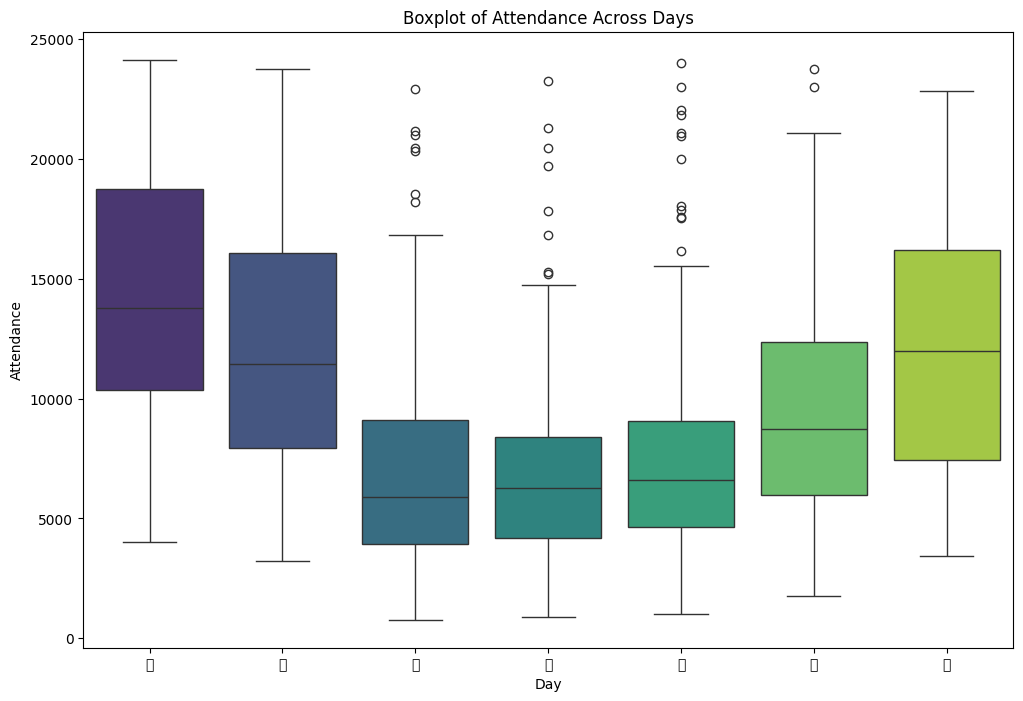

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns


# Creating a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='day', y='attendance', data=df, palette='viridis')
plt.title('Boxplot of Attendance Across Days')
plt.xlabel('Day')
plt.ylabel('Attendance')
plt.show()

def show_some(team, df, x):
    if x in objects:
        plt.figure(figsize=(12, 8))
        sns.boxplot(x=x, y='attendance', data=df, palette='viridis')
        plt.title(f'Boxplot of Attendance Across {x} for {team}')
        plt.xlabel(x)
        plt.ylabel('Attendance')
        plt.show()
        plt.figure(figsize=(12, 8))
        sns.barplot(x=x, y='attendance', data=df, palette='viridis')
        plt.title(f'Barplot of Attendance Across {x} for {team}')
        plt.xlabel(x)
        plt.ylabel('Attendance')
        plt.show()
    else:
        plt.figure(figsize=(12, 8))
        sns.lineplot(x=x, y='attendance', data=df)
        plt.title(f'Lineplot of Attendance Across {x} for {team}')
        plt.xlabel(x)
        plt.ylabel('Attendance')
        plt.show()
        plt.figure(figsize=(12, 8))
        sns.scatterplot(x=x, y='attendance', data=df)
        plt.title(f'Scatterplot of Attendance Across {x} for {team}')
        plt.xlabel(x)
        plt.ylabel('Attendance')
        plt.show()
        
    
# def show_bar(team, df, x):
#     plt.figure(figsize=(12, 8))
#     sns.barplot(x=x, y='attendance', data=df, palette='viridis')
#     plt.title(f'Barplot of Attendance Across {x} for {team}')
#     plt.xlabel('Day')
#     plt.ylabel('Attendance')
#     plt.show()

히트맵 그리기

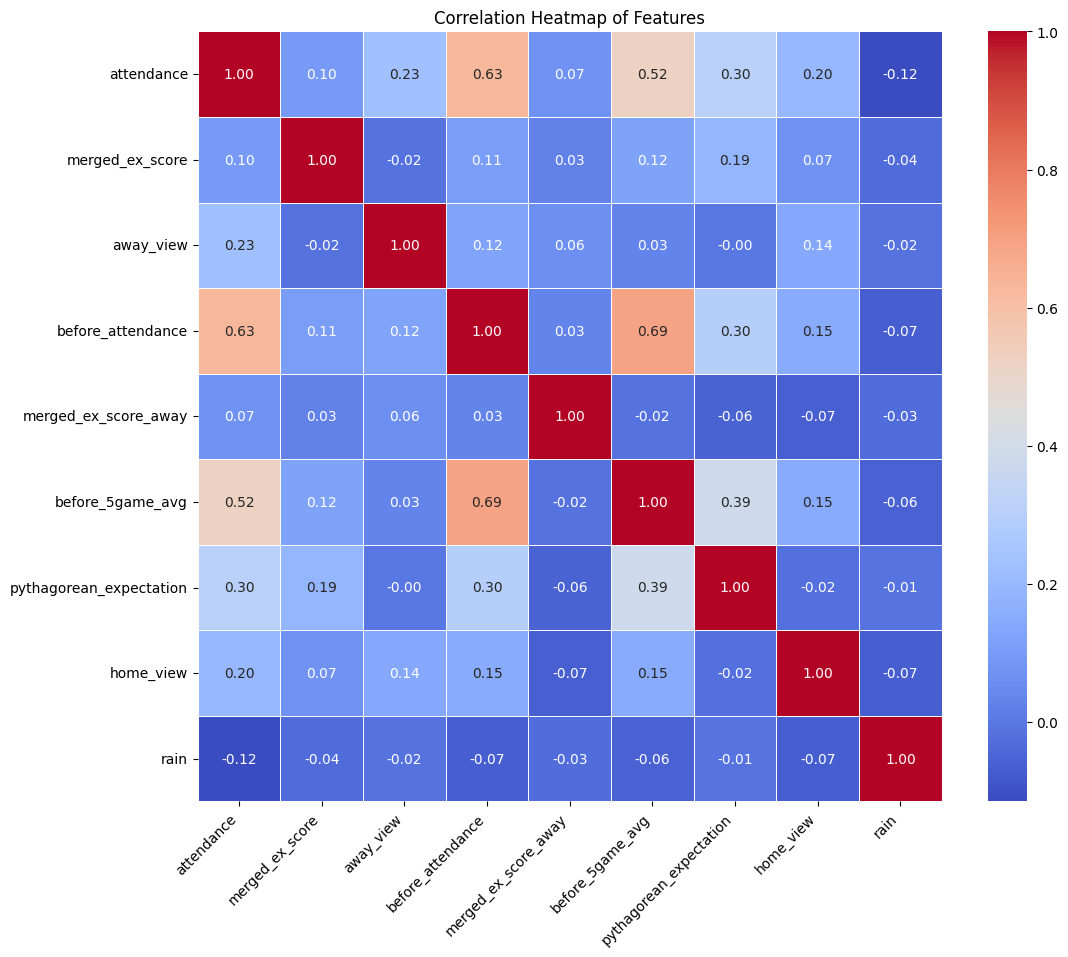

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with features
# Replace the following line with your actual DataFrame or data
# Example:
# df = your_dataframe
df_num = df[numerics3]
# Calculate the correlation matrix
correlation_matrix = df_num.corr()

# Creating a heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Rotate x-axis labels for better readability
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation Heatmap of Features')
plt.show()

Actual vs Predicted

Root mean square error: 2440.949302568739


/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


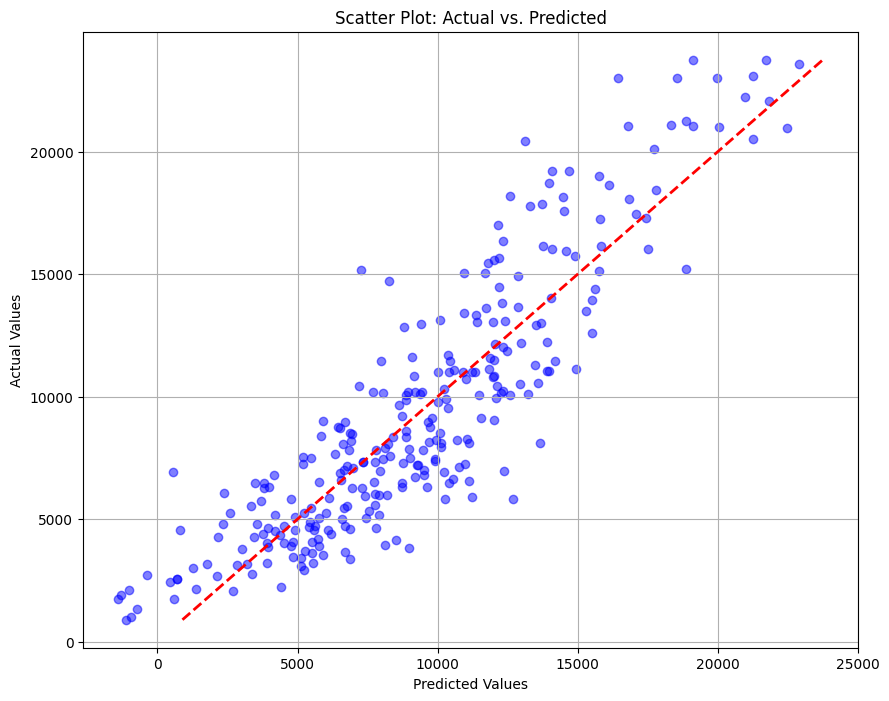

In [136]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame with columns 'actual' and 'predicted'
# Replace the following line with your actual DataFrame or data
df_total = df[total]

y = df['attendance']
x = df.drop(columns = 'attendance')

x_dummies = pd.get_dummies(x, drop_first=True)

scaler = MinMaxScaler()
X = scaler.fit_transform(x_dummies)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

rmse = metrics.mean_squared_error(y_test,preds,squared=False)
print(f'Root mean square error: {rmse}')

    
#     return metrics.mean_squared_error(y_test,preds,squared=False)

# Creating a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y=y_test, x=preds, c='blue', alpha=0.5)
plt.title('Scatter Plot: Actual vs. Predicted')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # y=x line
plt.show()

team : Doosan,
original rmse : 4607.733671542835
holiday: -211.52342406769276
3game_results: -174.04666043597263
home_view: -123.3201473392819


/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/952030966.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_scores, x=features, palette="viridis")


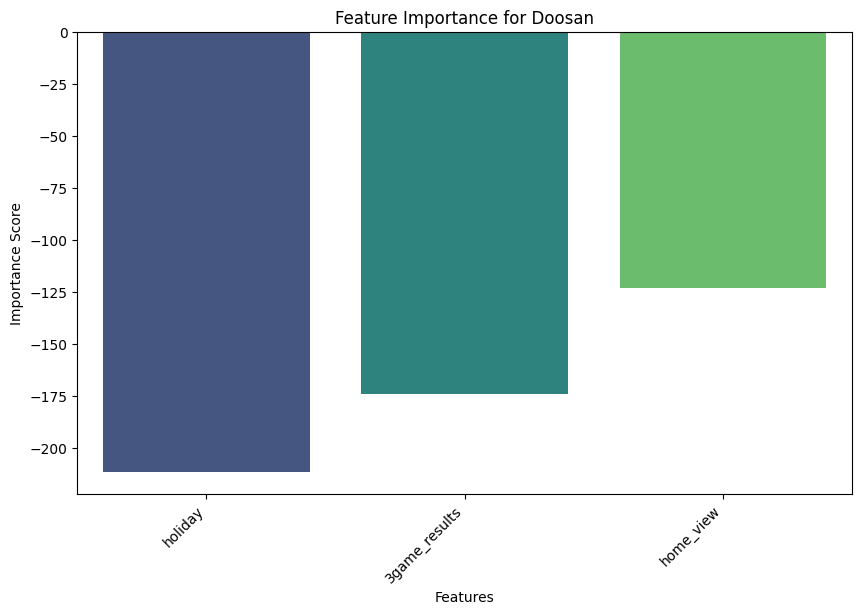

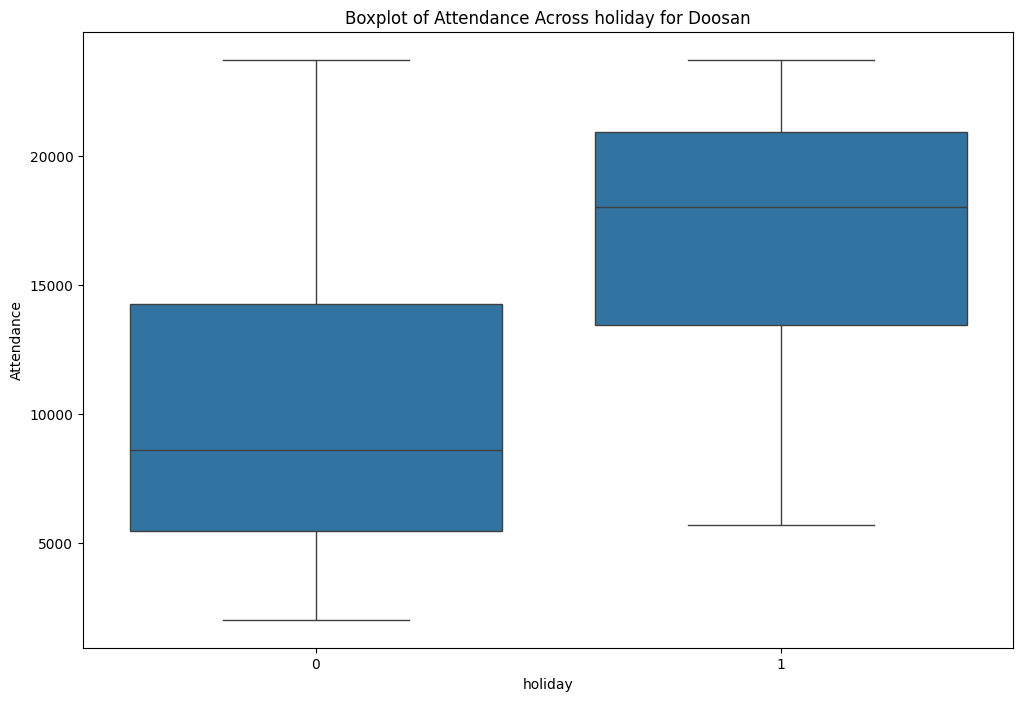

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


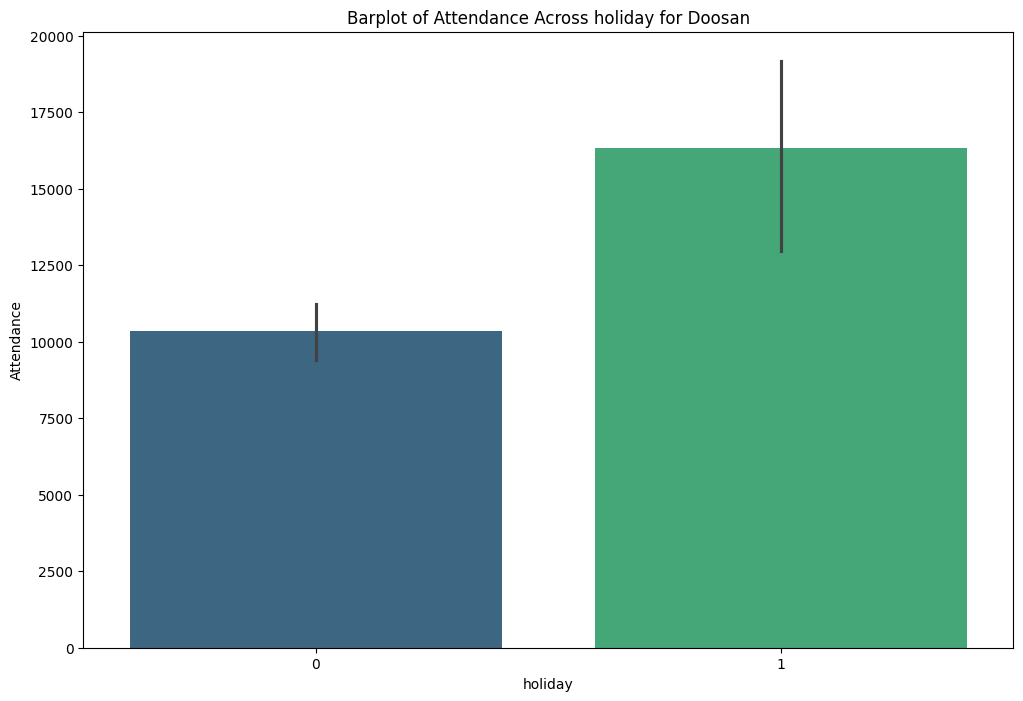

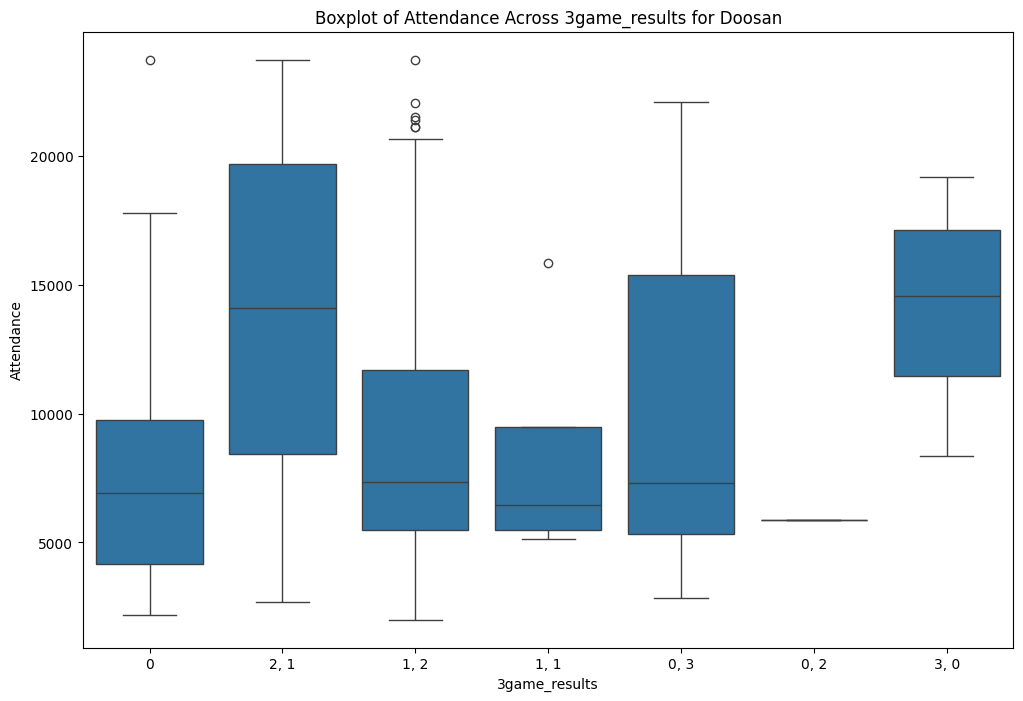

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


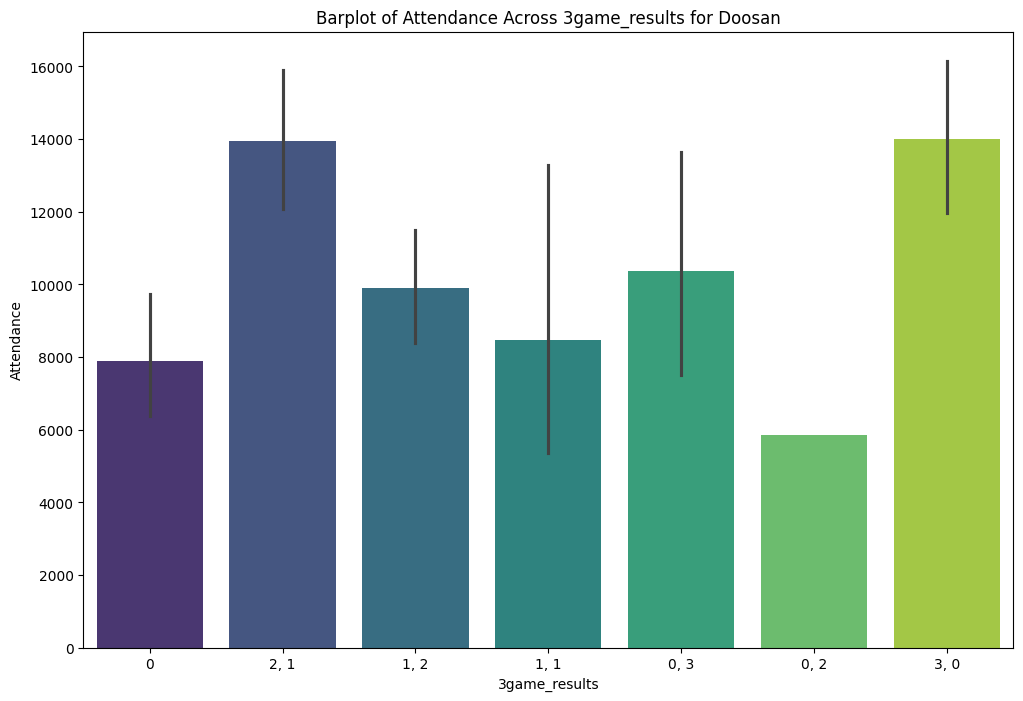

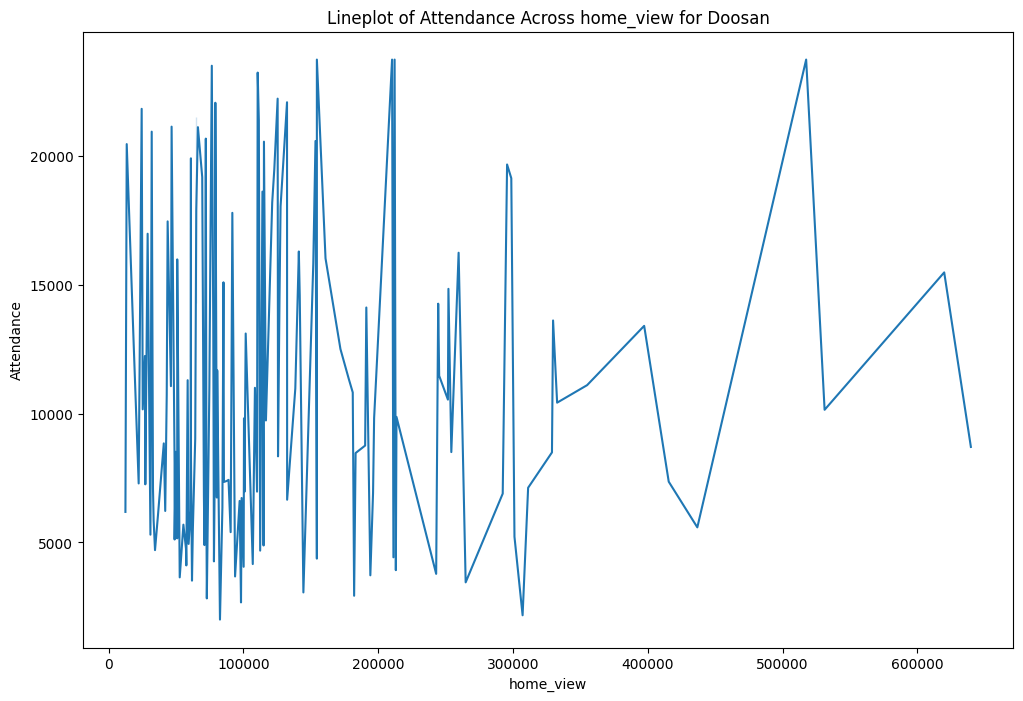

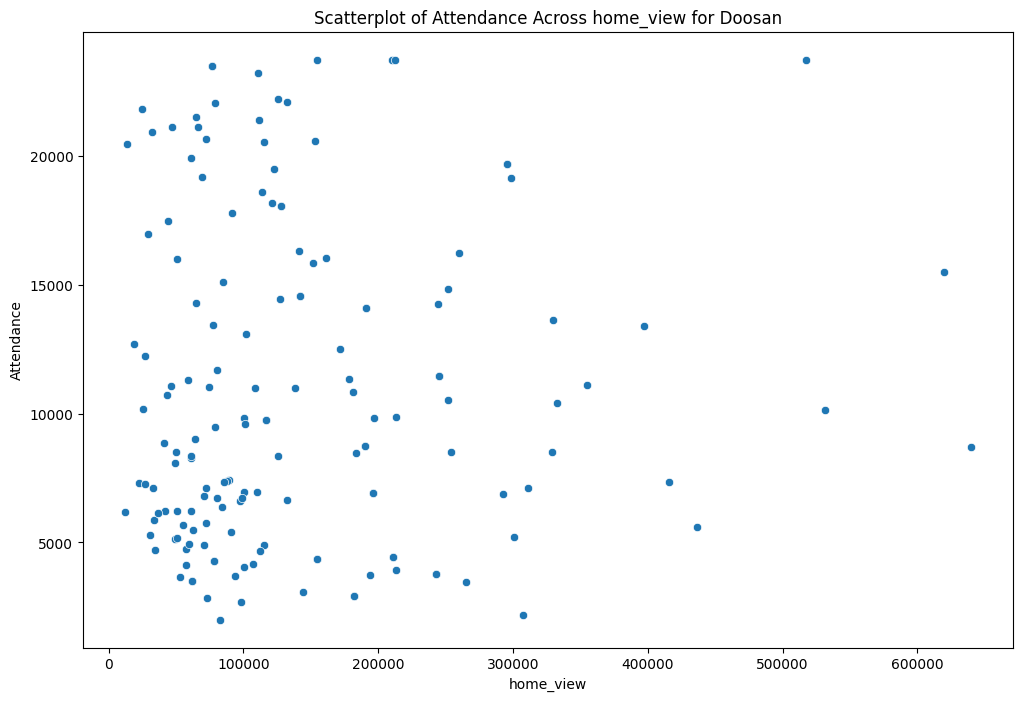

 
team : Hanhwa,
original rmse : 811059689114859.8
pythagorean_expectation: -2.250031102001365e+16
3game_evens: -7230430125616027.0
merged_ex_score_away: -6712413233289705.0


/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/952030966.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_scores, x=features, palette="viridis")


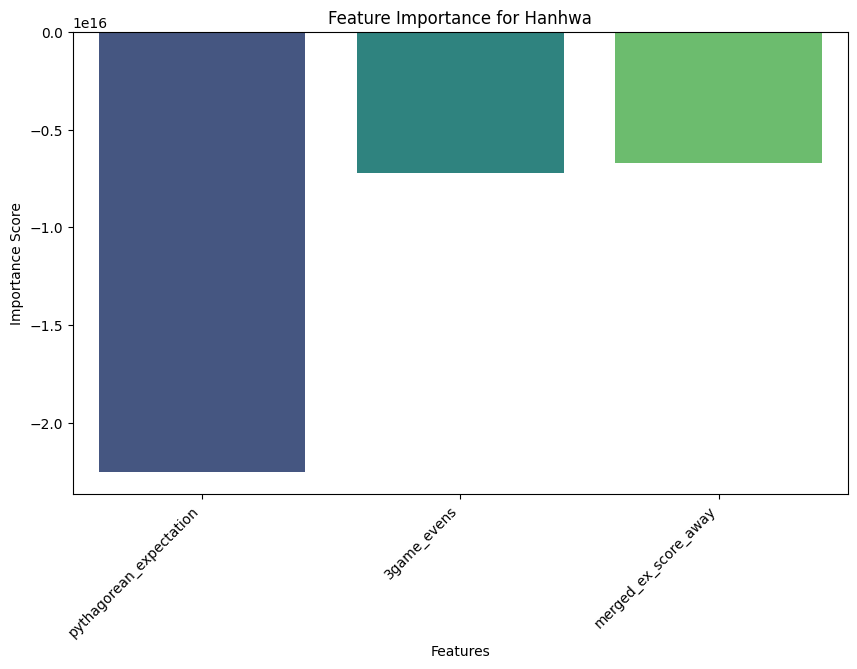

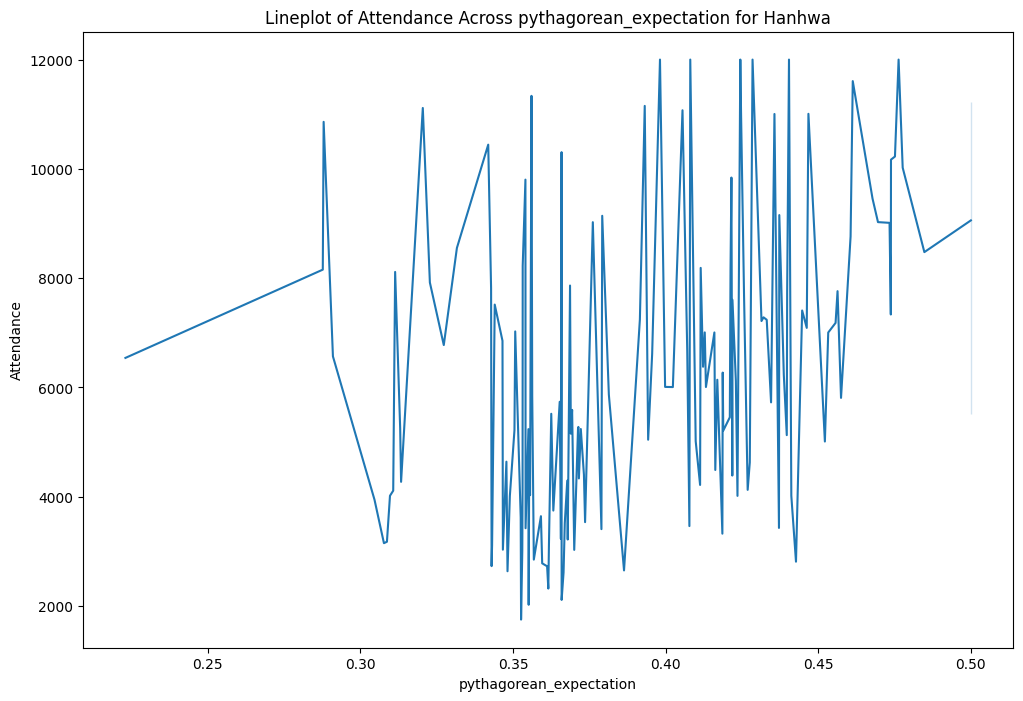

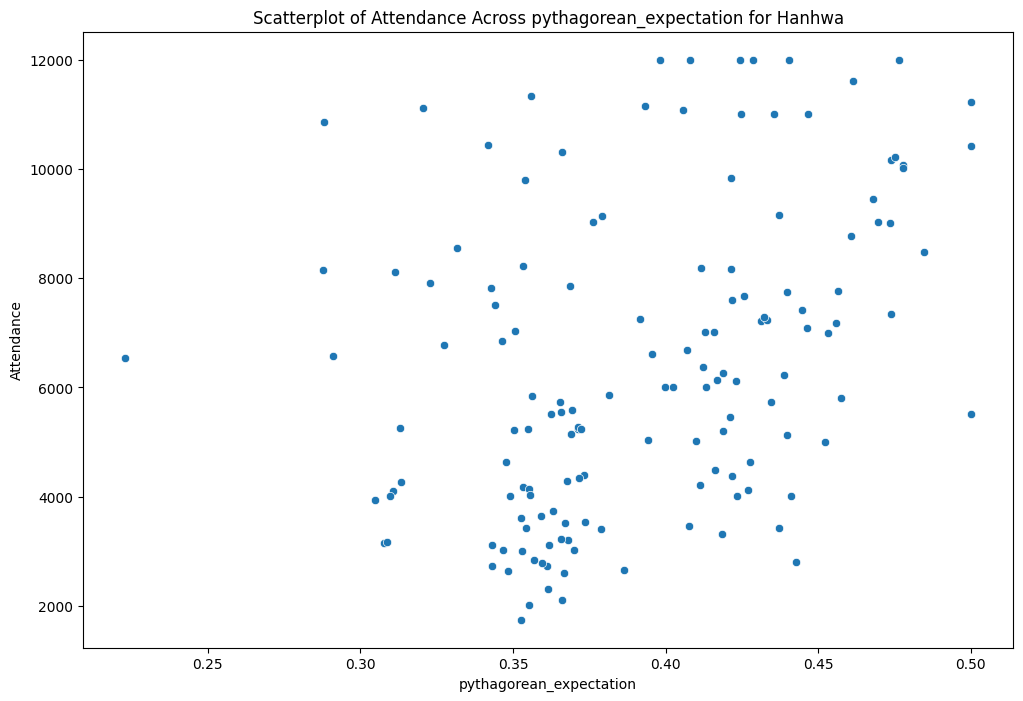

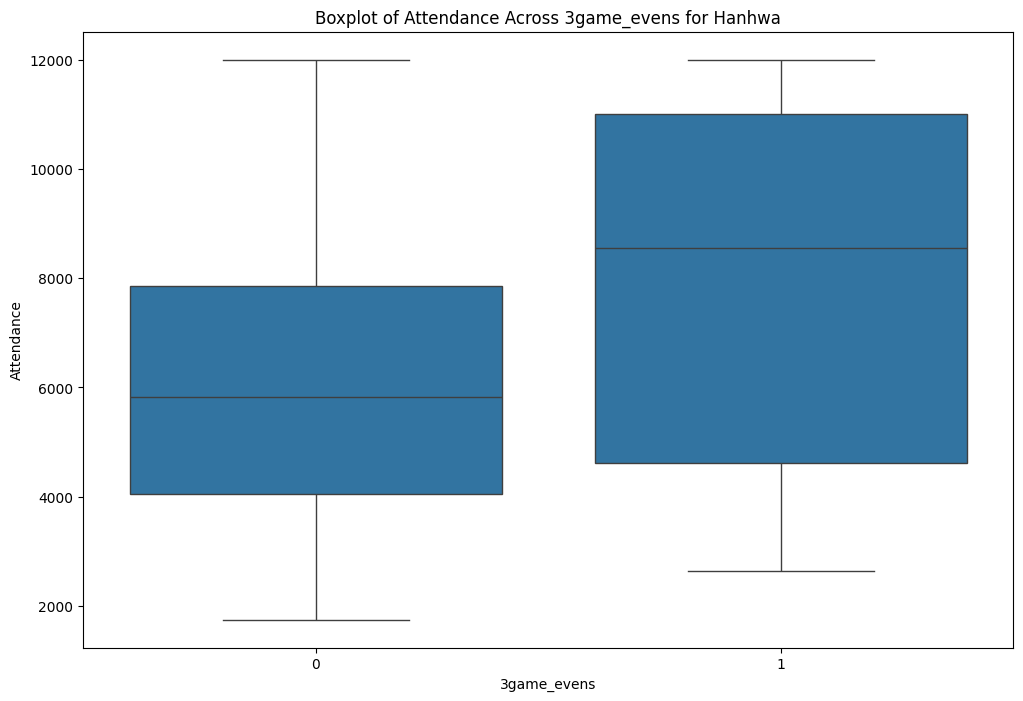

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


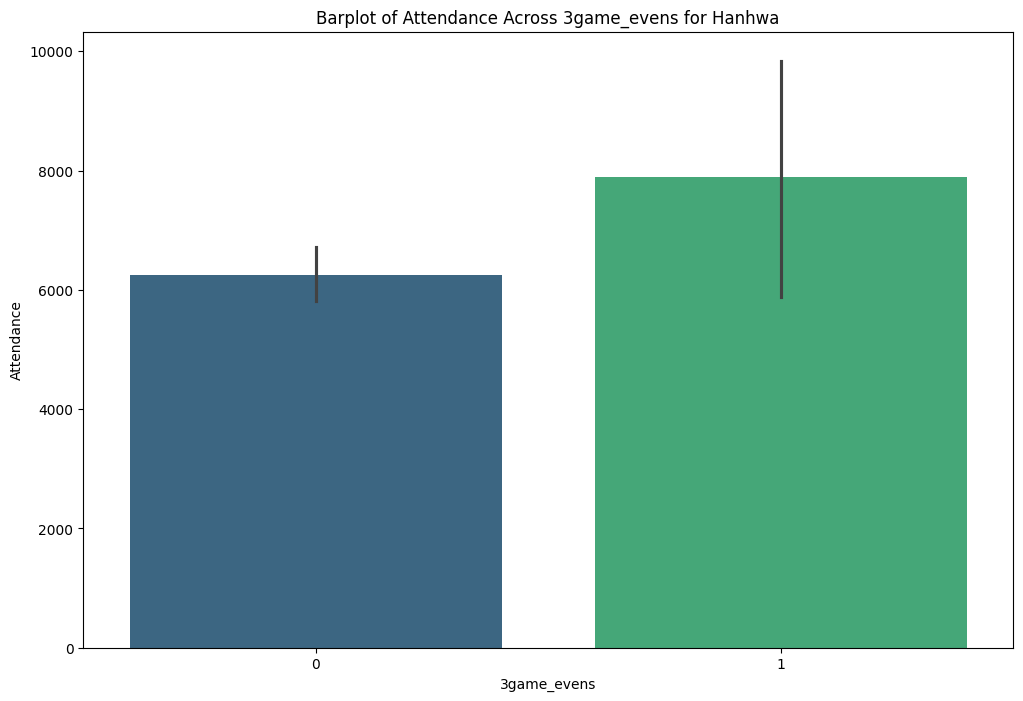

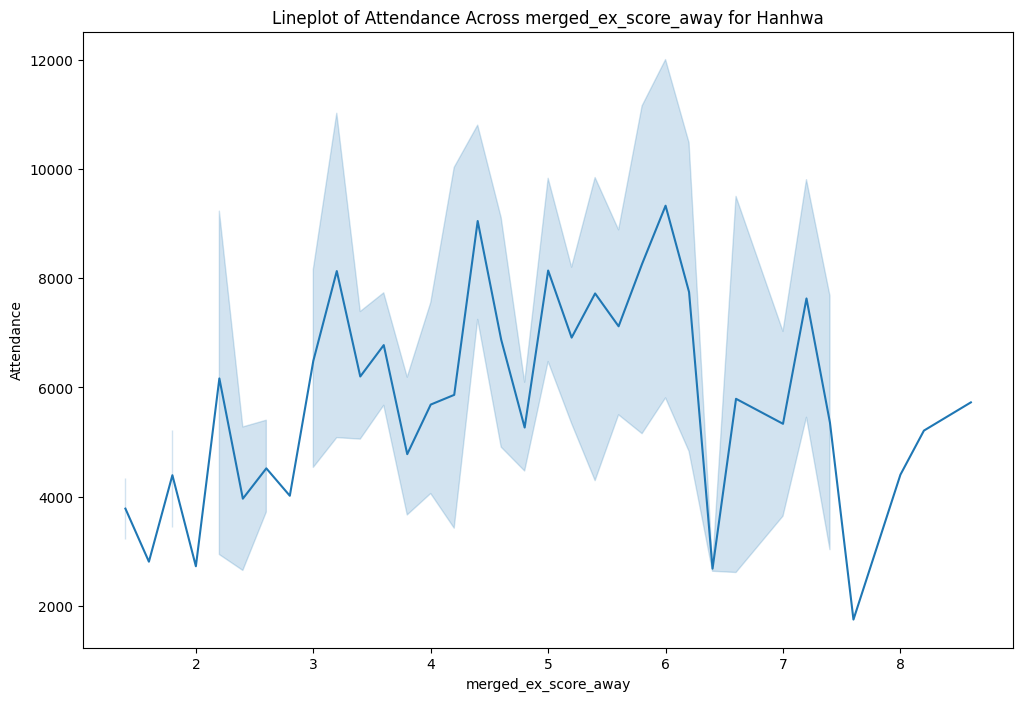

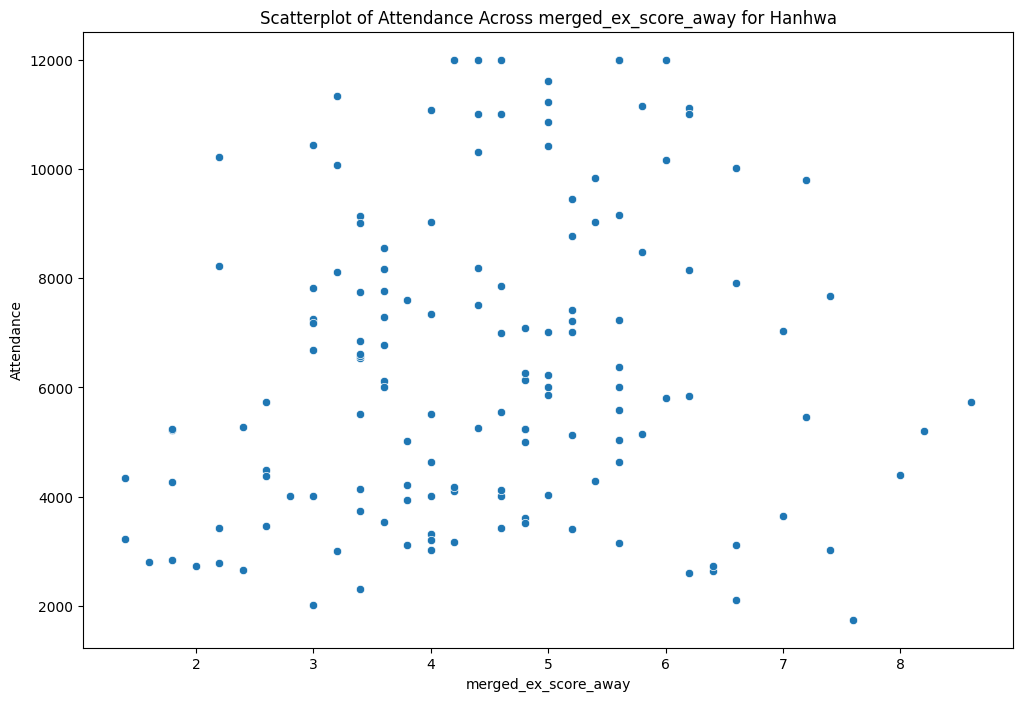

 
team : KIA,
original rmse : 2952.7366970679773
day: -1237.6447593605003
month: -174.34092677843591
rain: -139.64510316349015


/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/952030966.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_scores, x=features, palette="viridis")


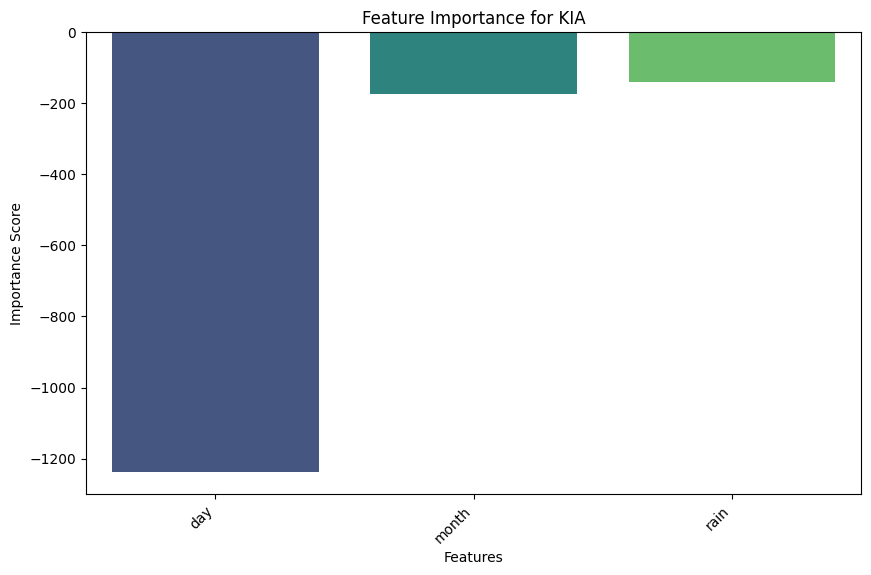

/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: Use

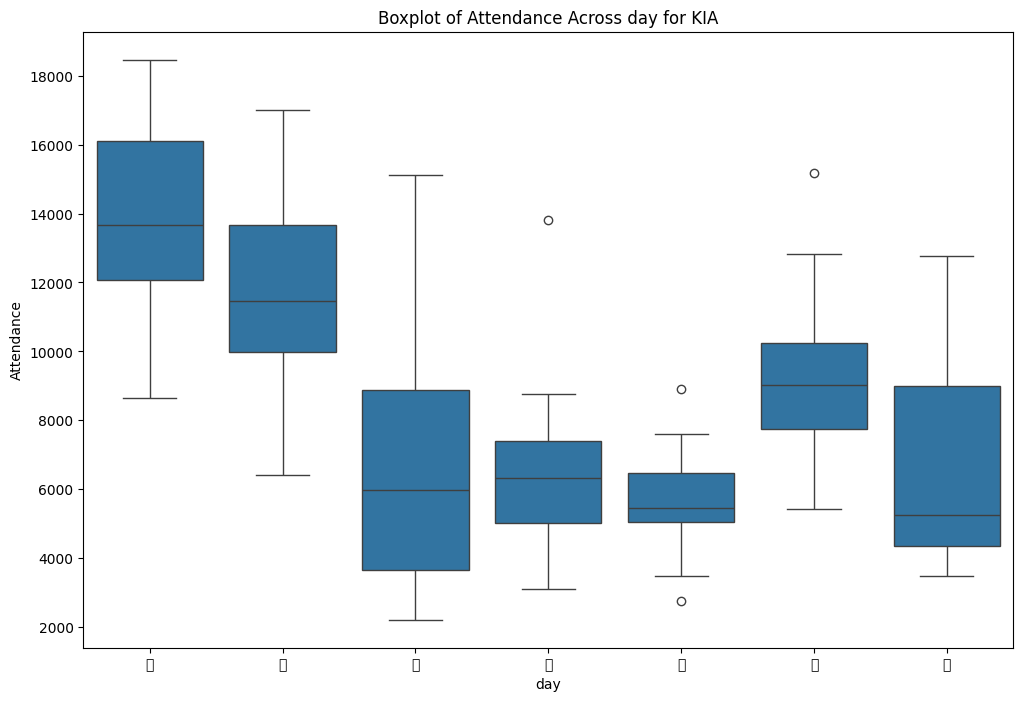

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/

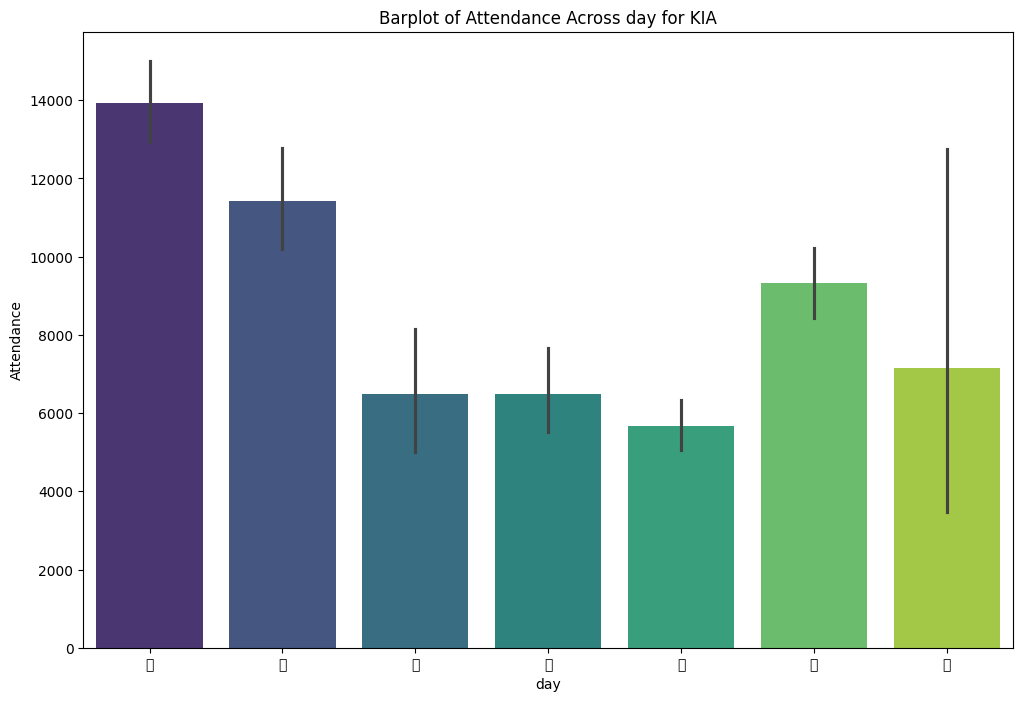

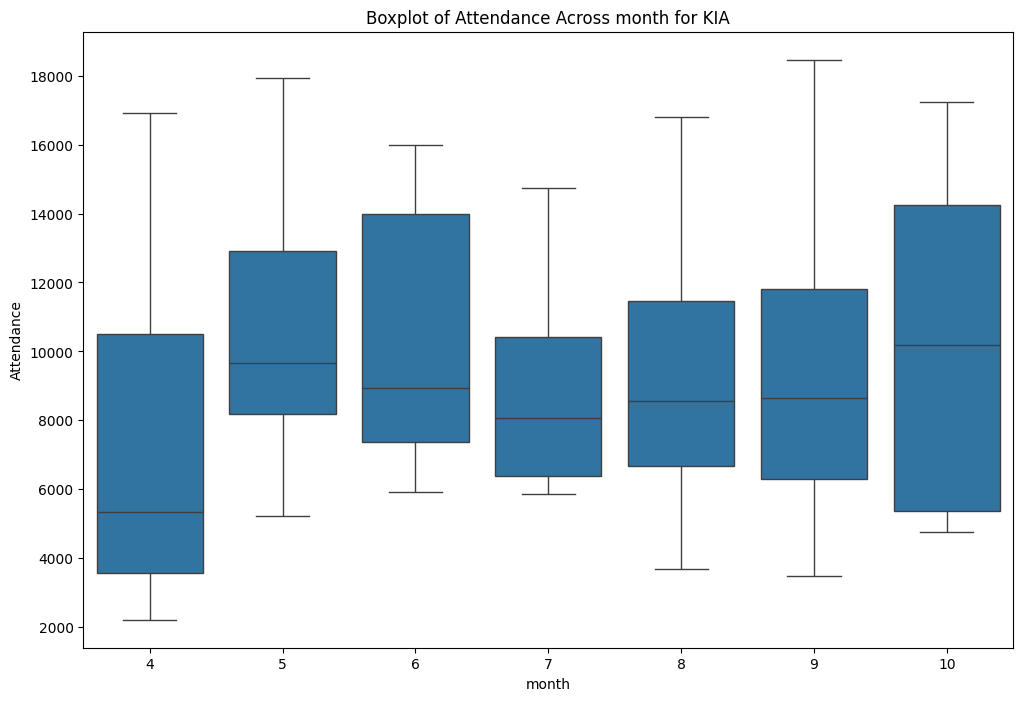

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


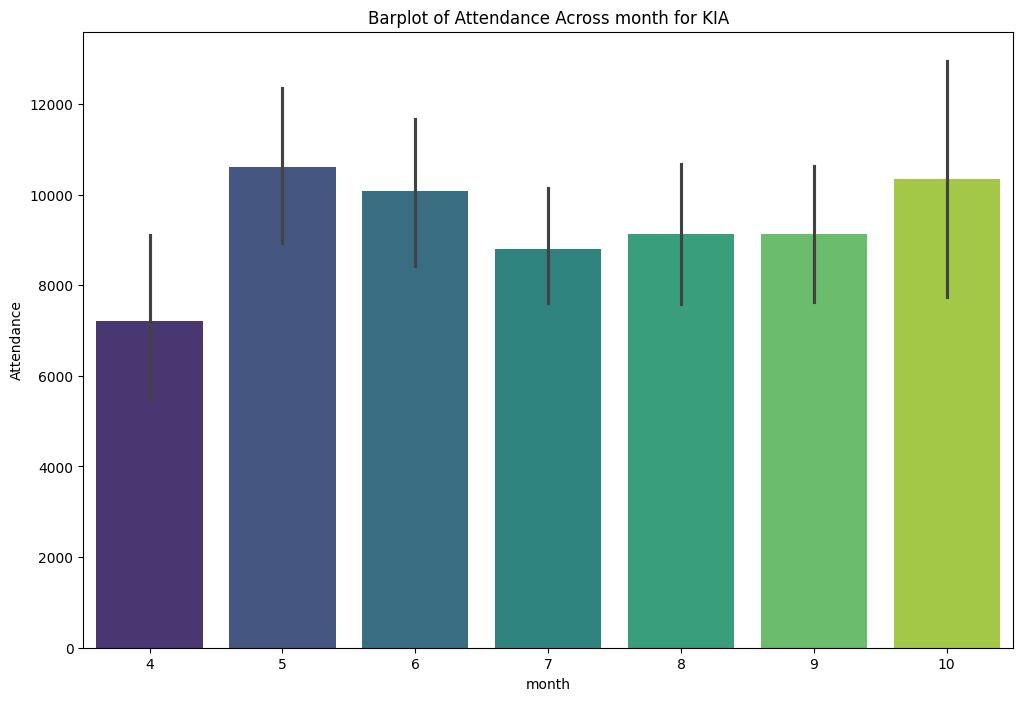

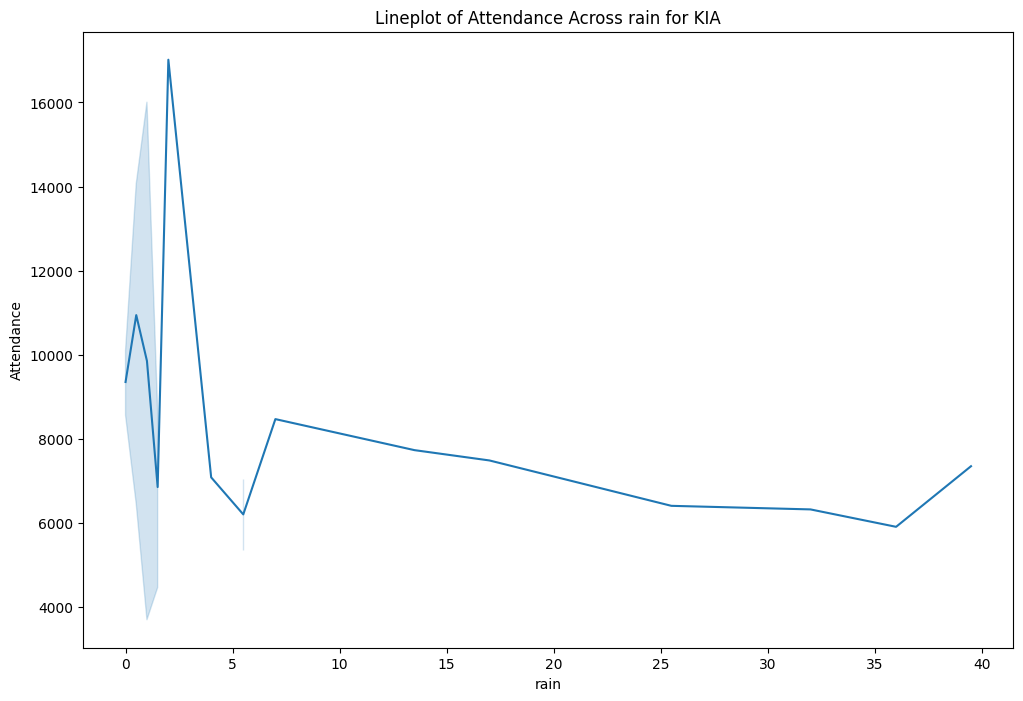

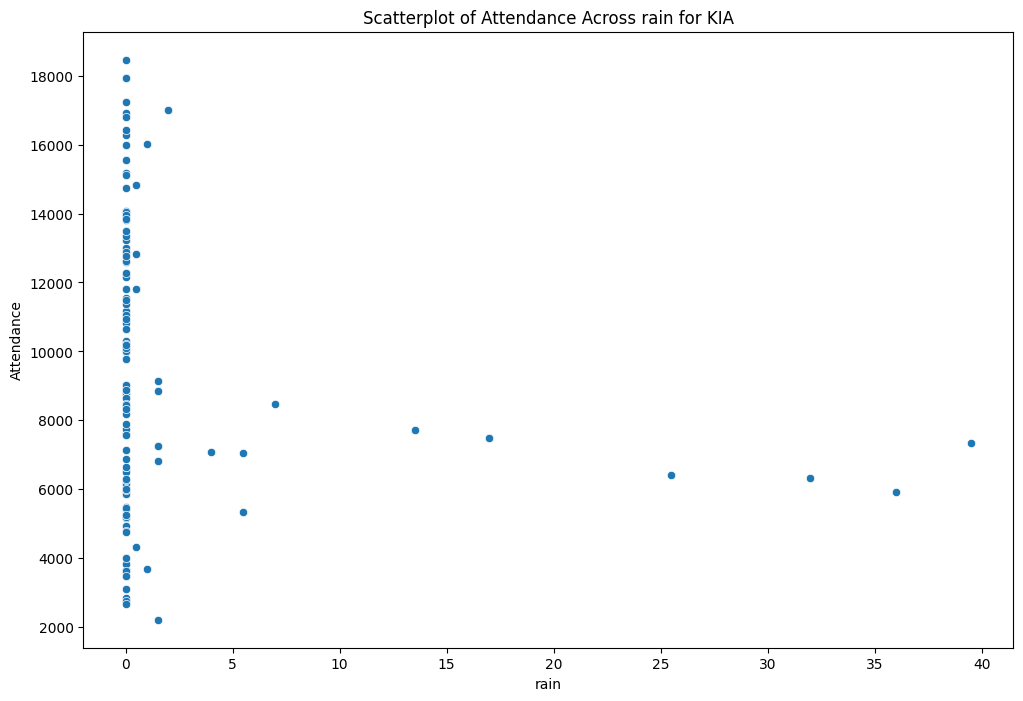

 
team : KT,
original rmse : 3294.3750338472946
away: -1549.3955062851082
away_rank: -511.3470276136982
home_rank: -326.2479133219049


/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/952030966.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_scores, x=features, palette="viridis")


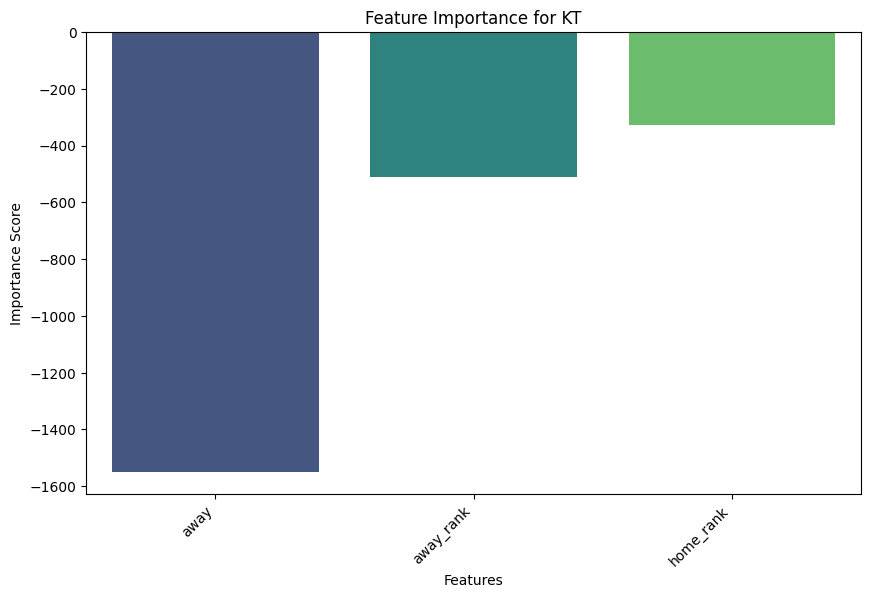

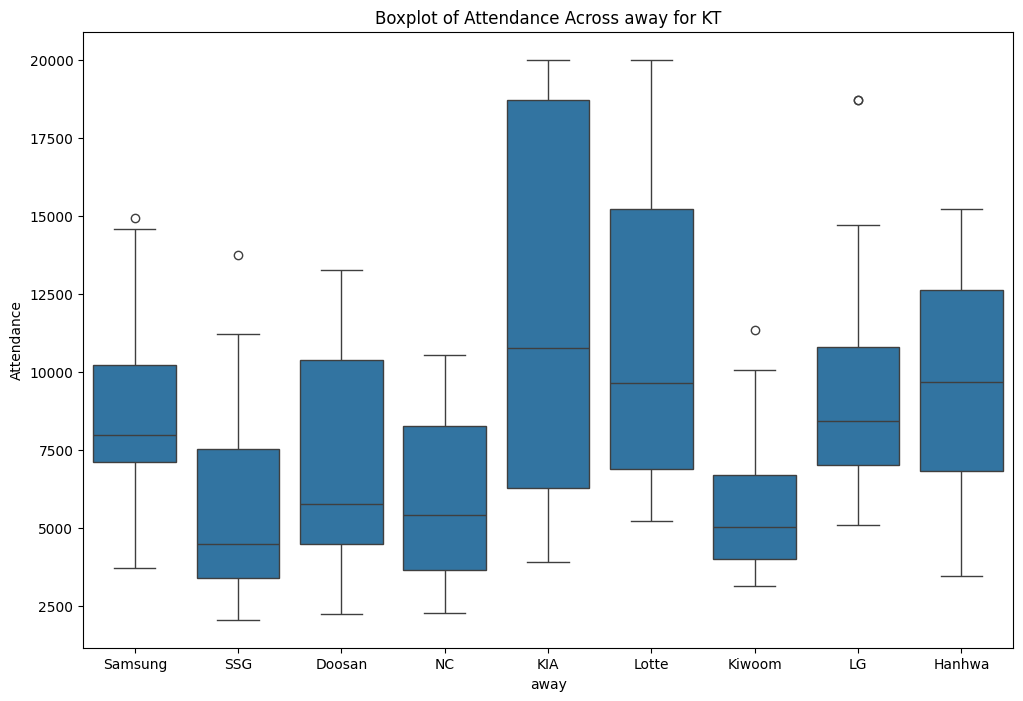

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


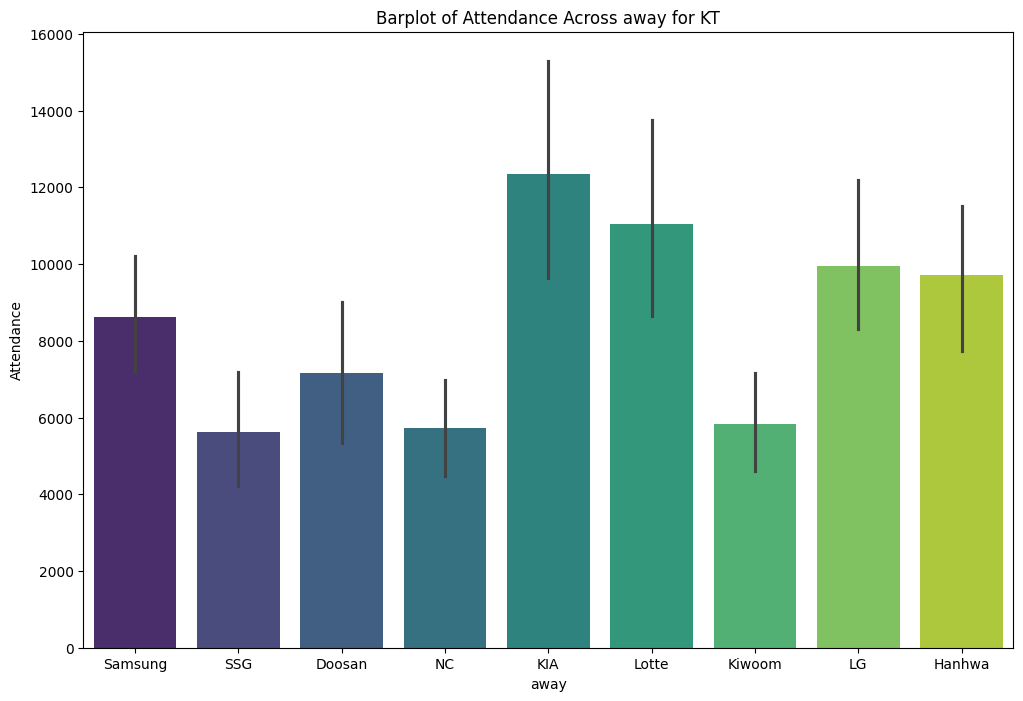

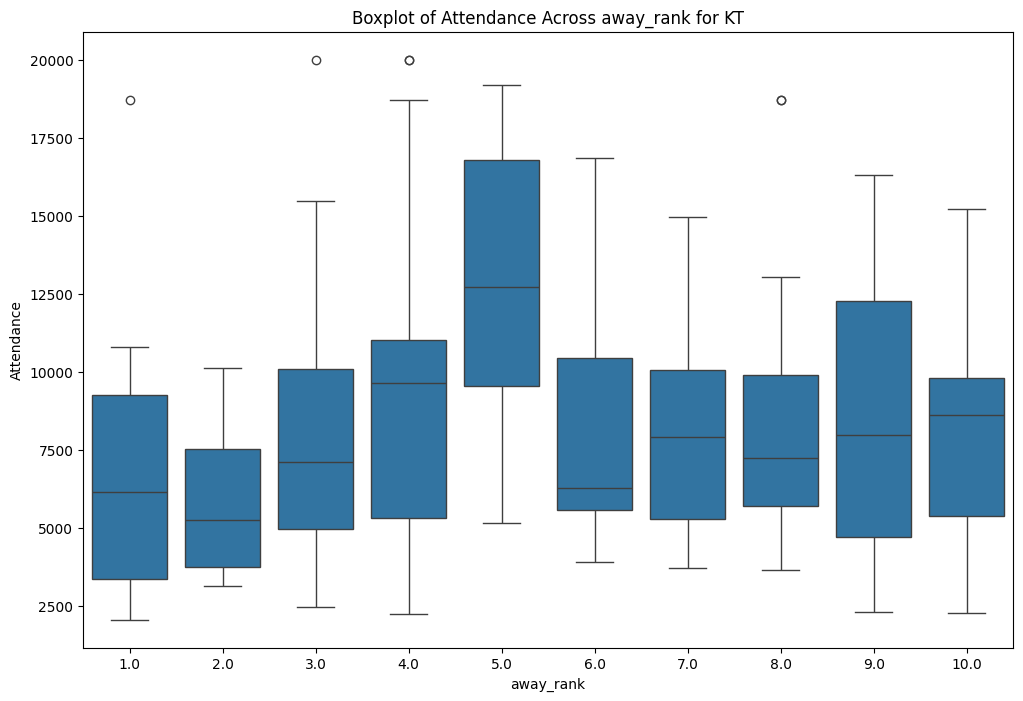

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


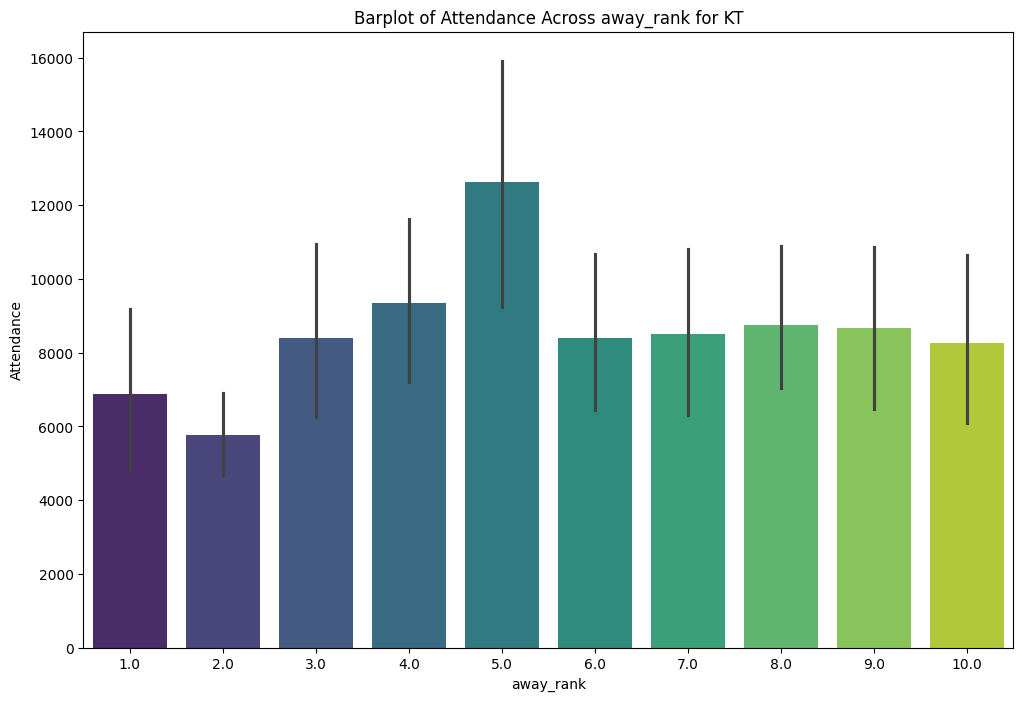

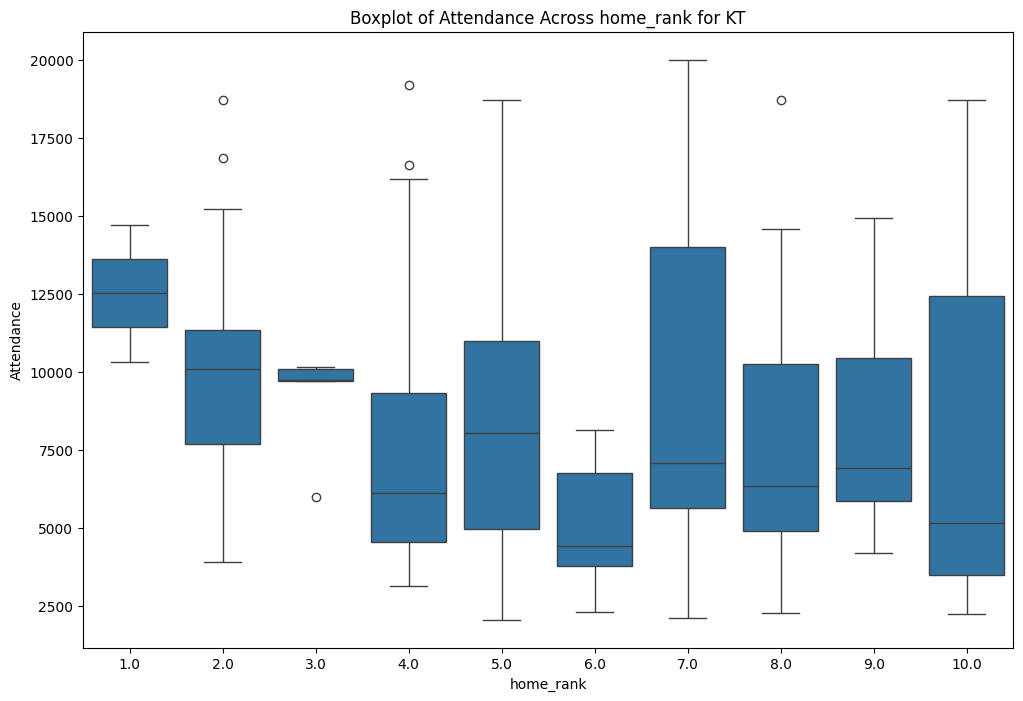

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


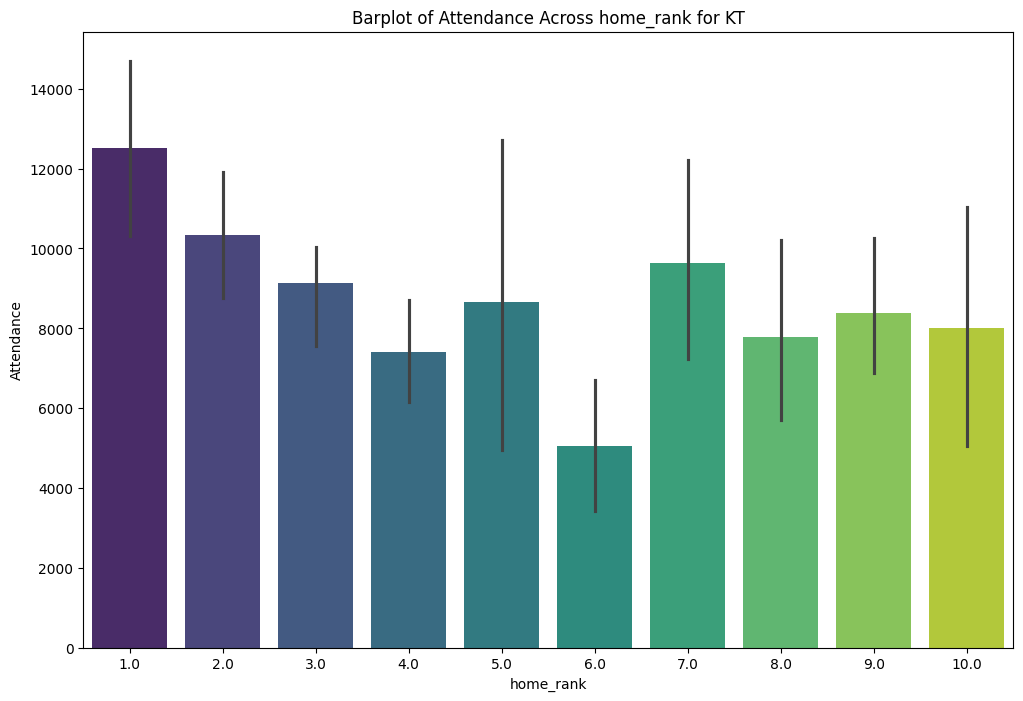

 
team : Kiwoom,
original rmse : 1352.7352915316185
away: -477.7425999201671
month: -288.5713584518496
year: -231.94628847678496


/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/952030966.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_scores, x=features, palette="viridis")


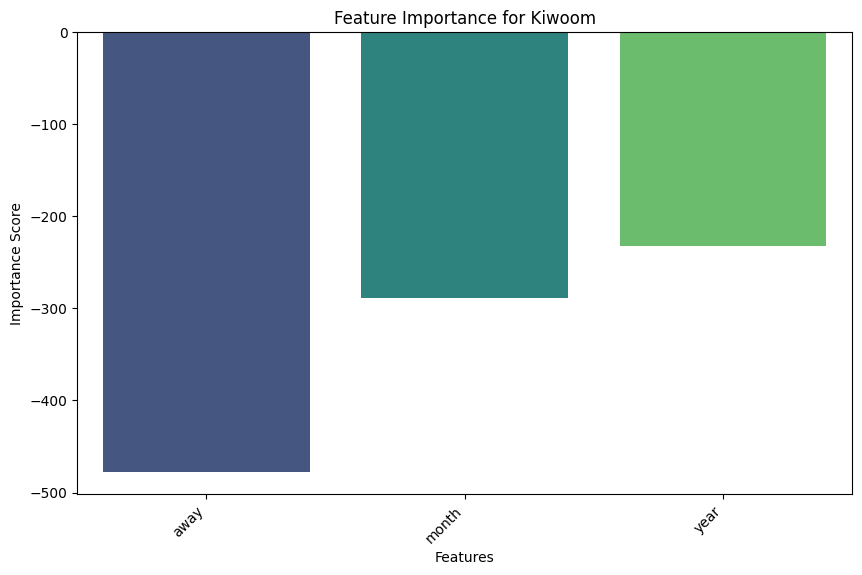

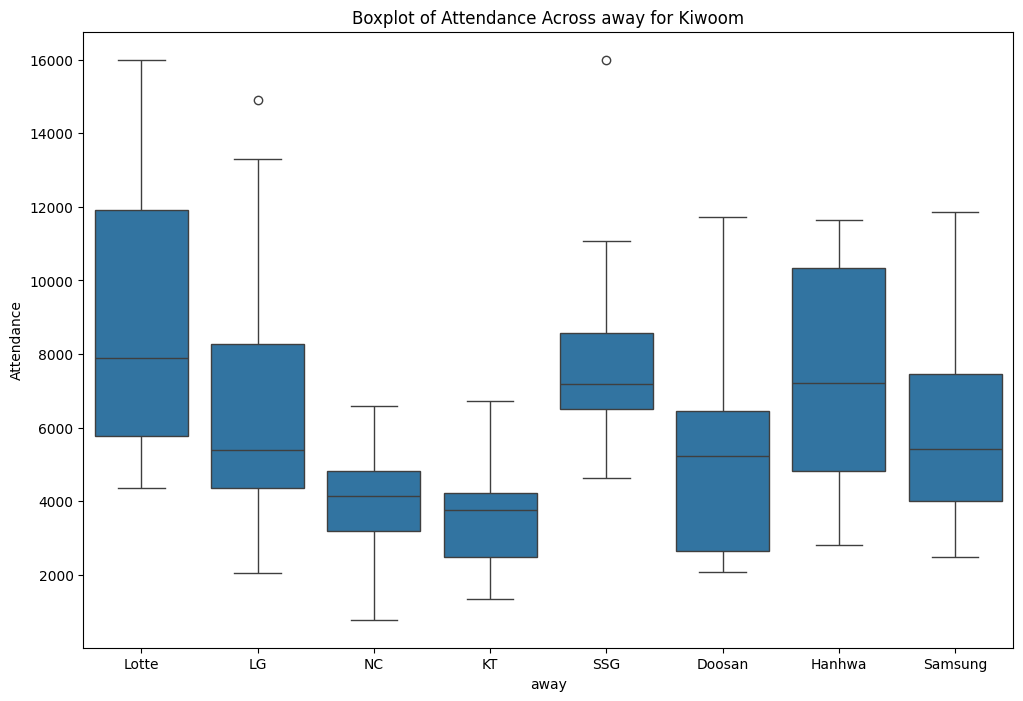

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


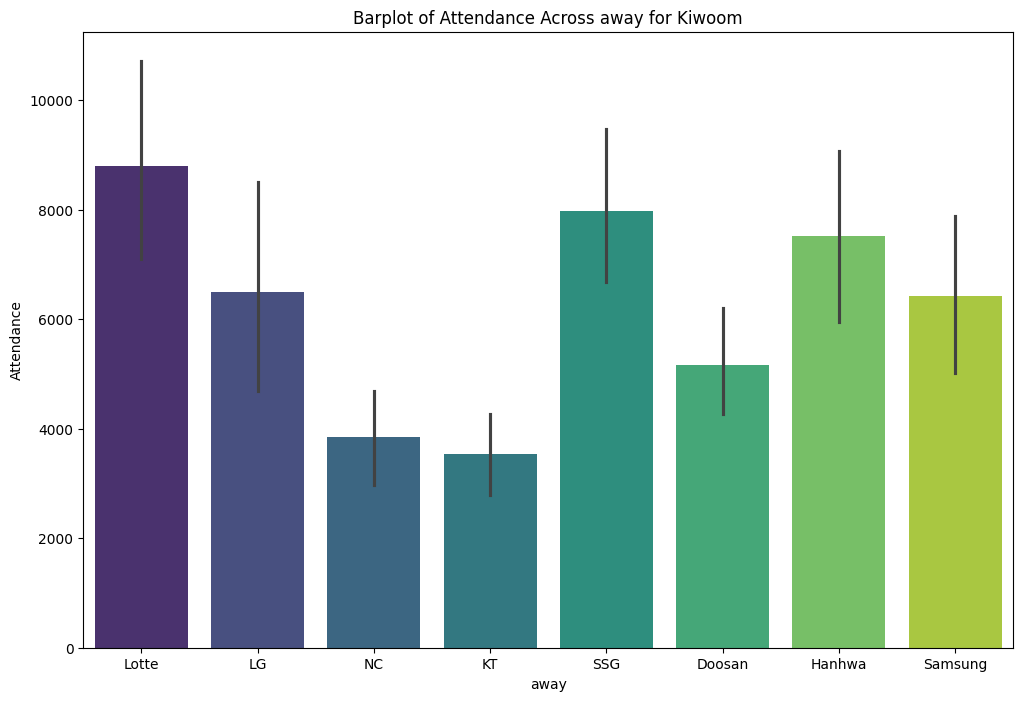

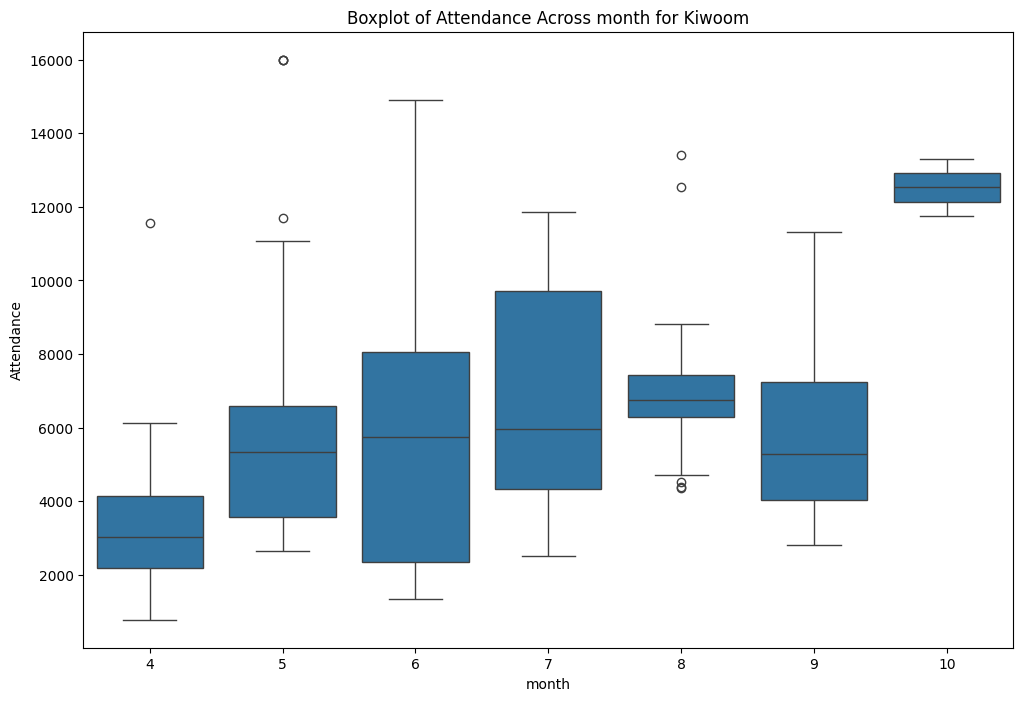

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


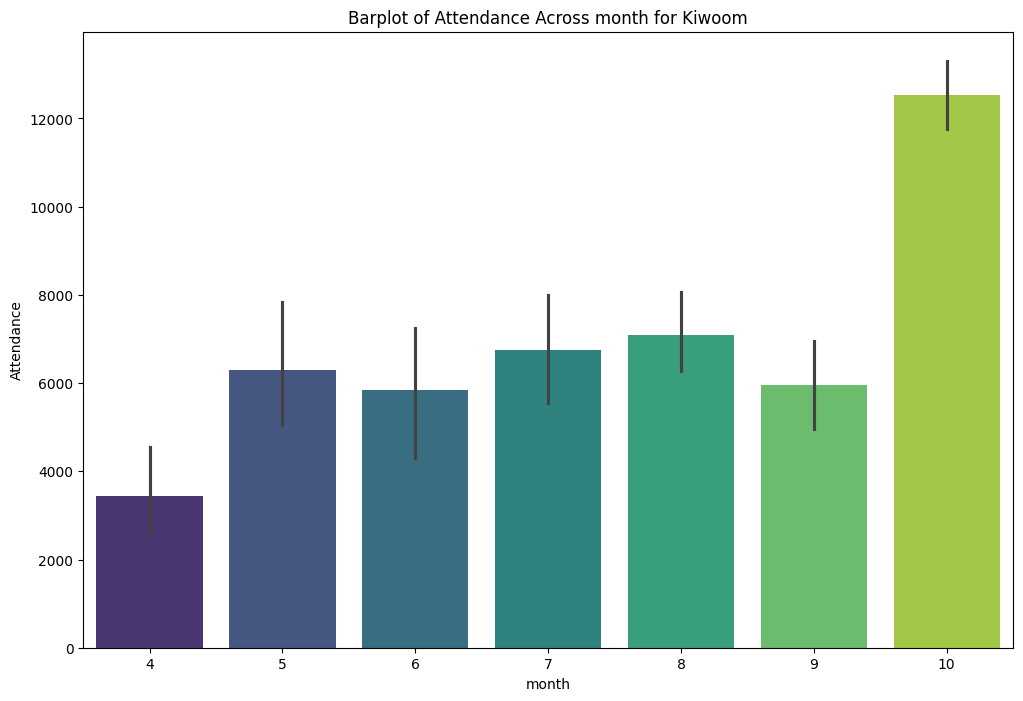

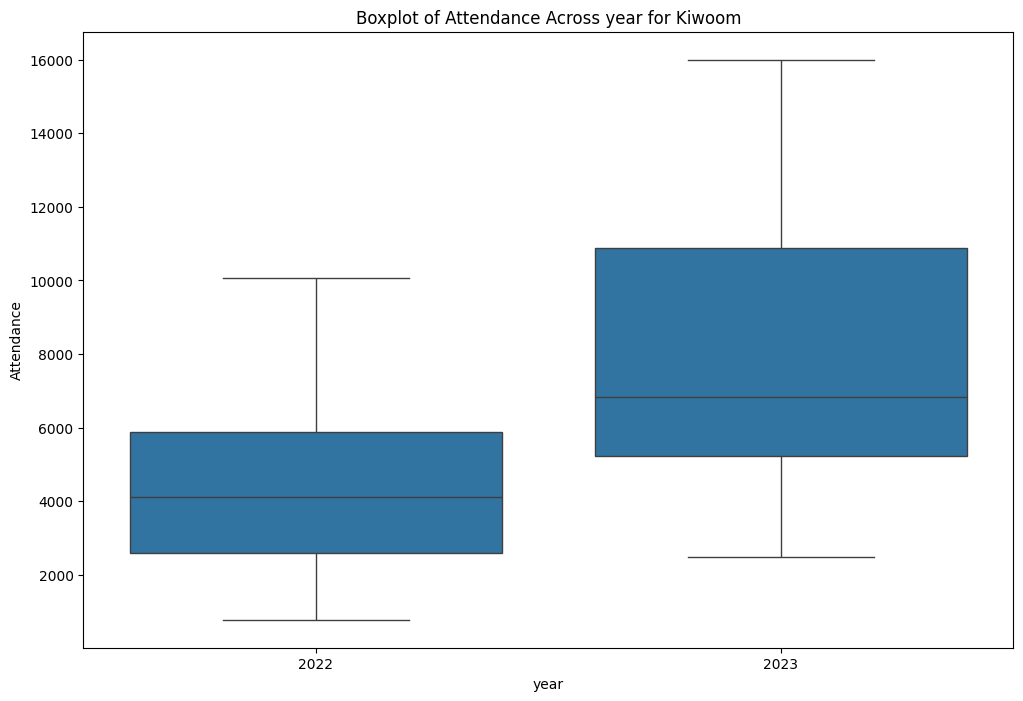

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


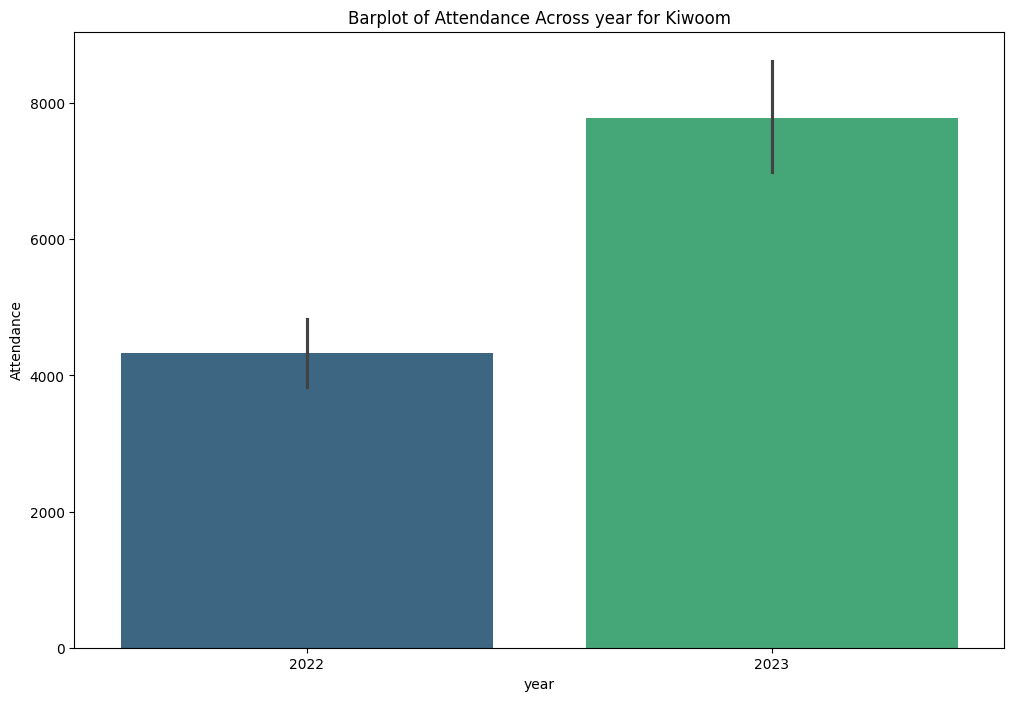

 
team : LG,
original rmse : 86552682973079.27
merged_ex_score: -2.0580187260419116e+16
home_view: -1.9548539797920452e+16
merged_ex_score_away: -1.160893870788445e+16


/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/952030966.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_scores, x=features, palette="viridis")


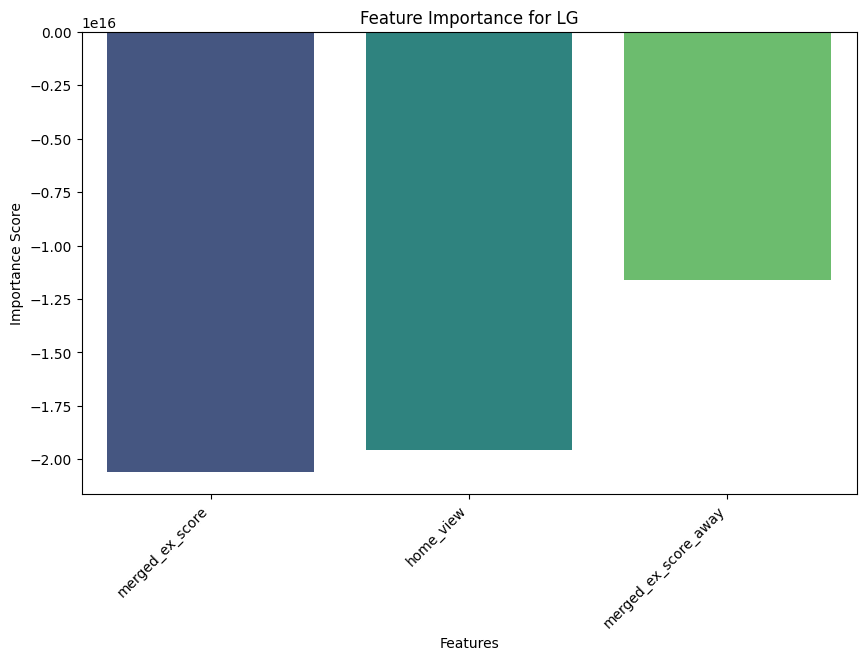

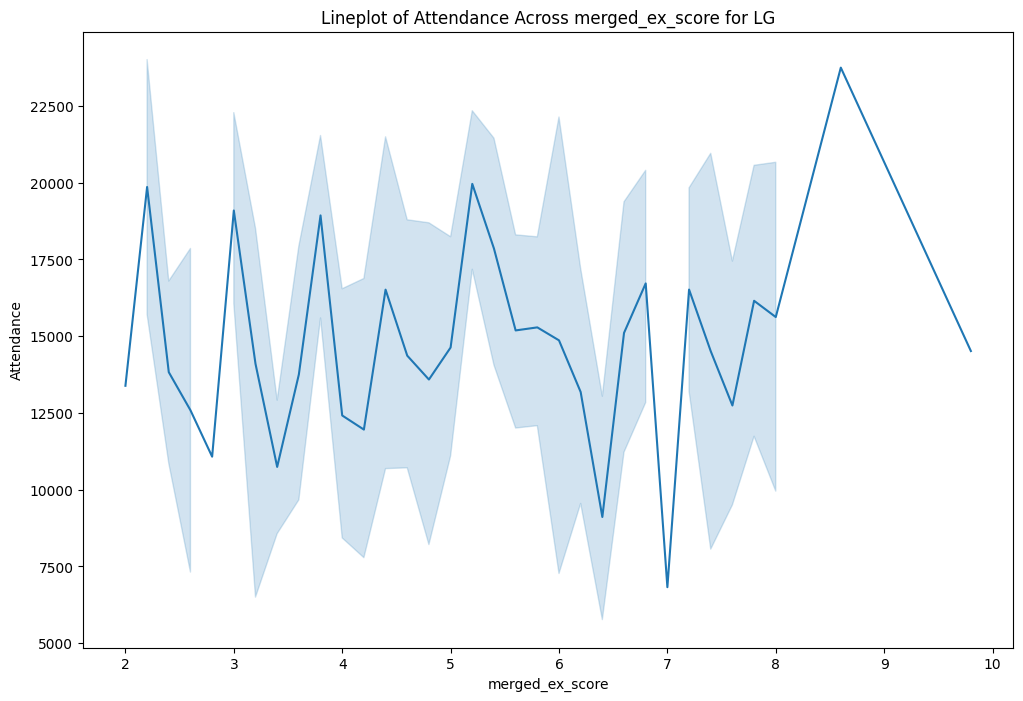

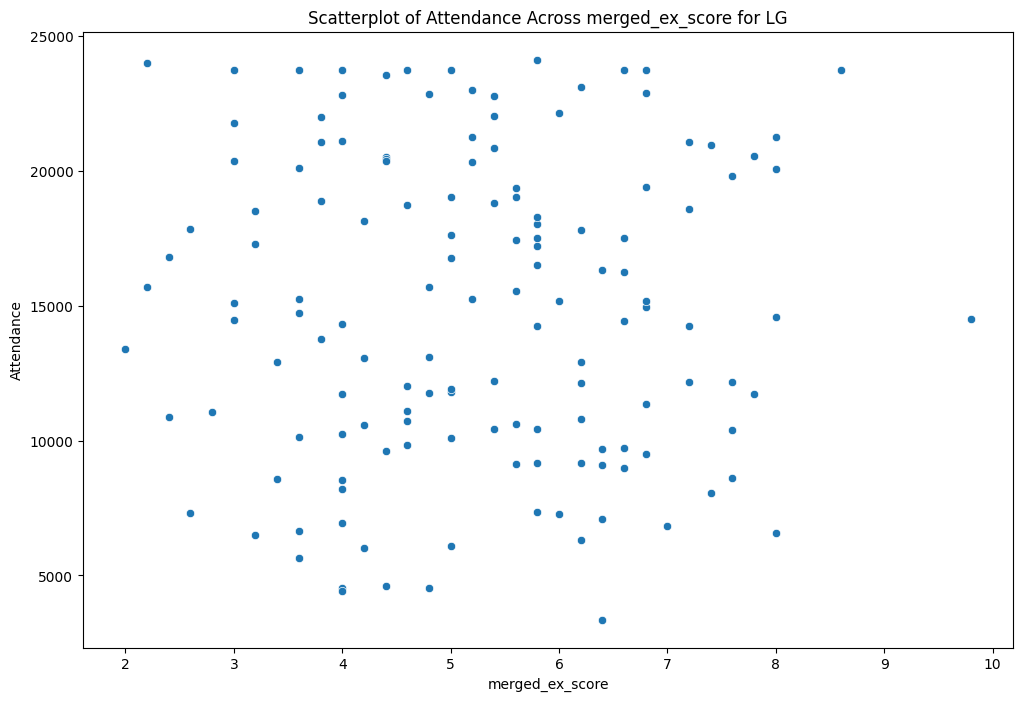

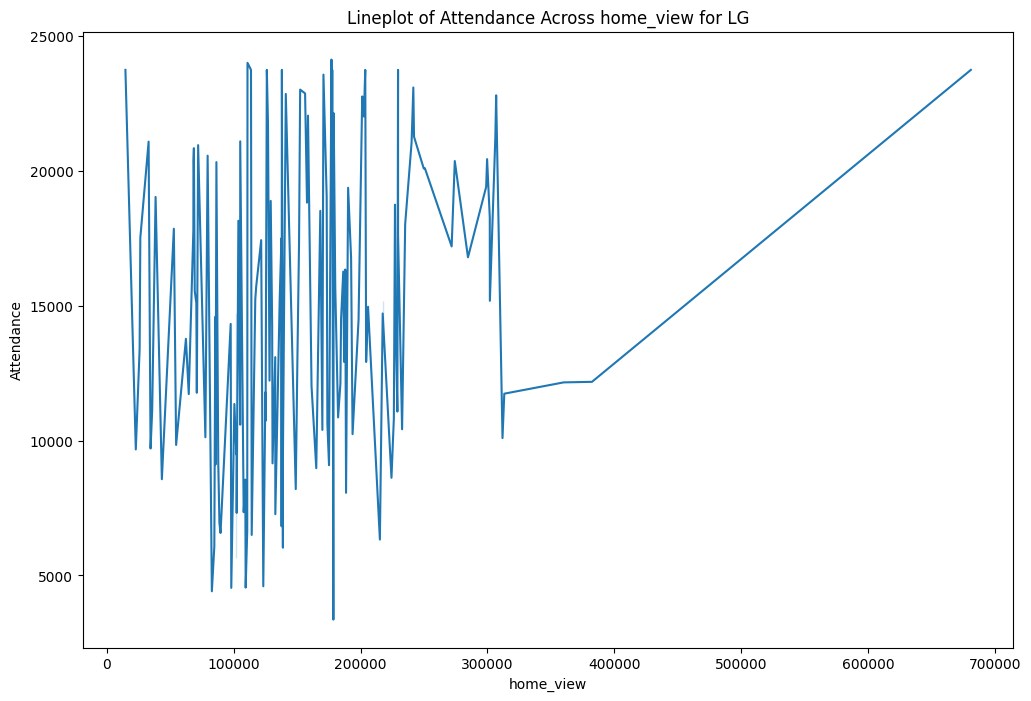

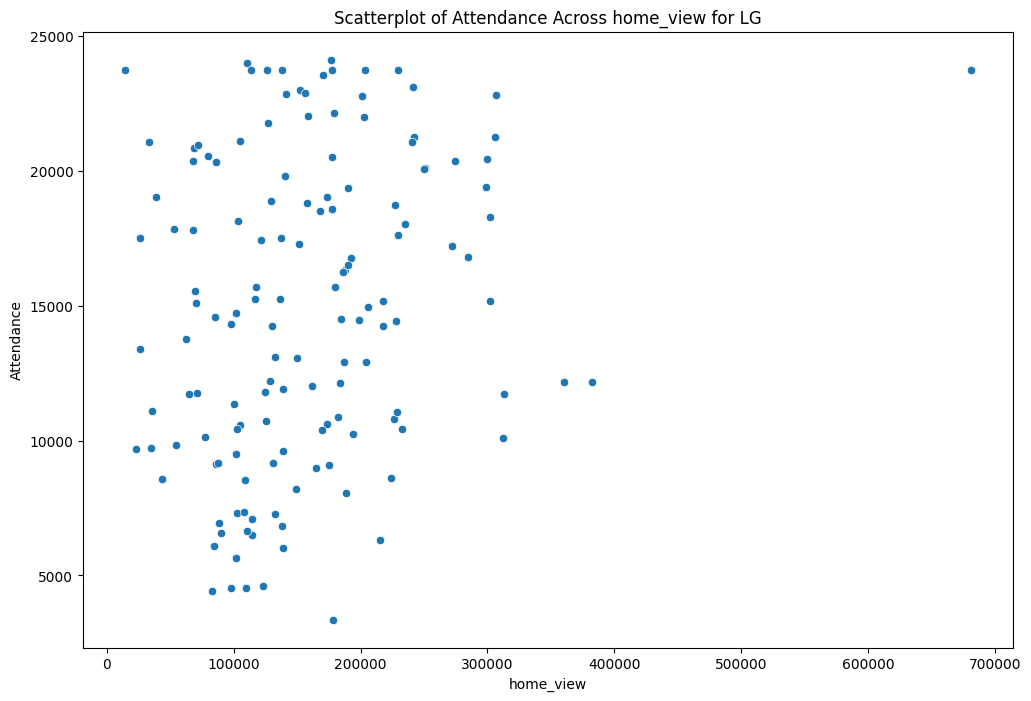

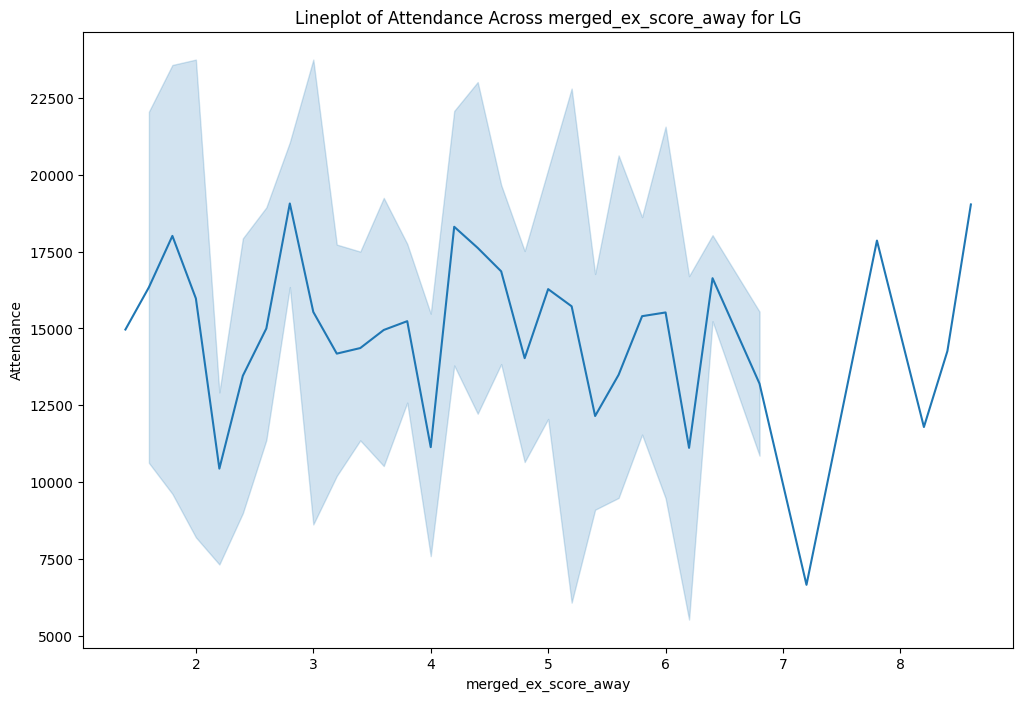

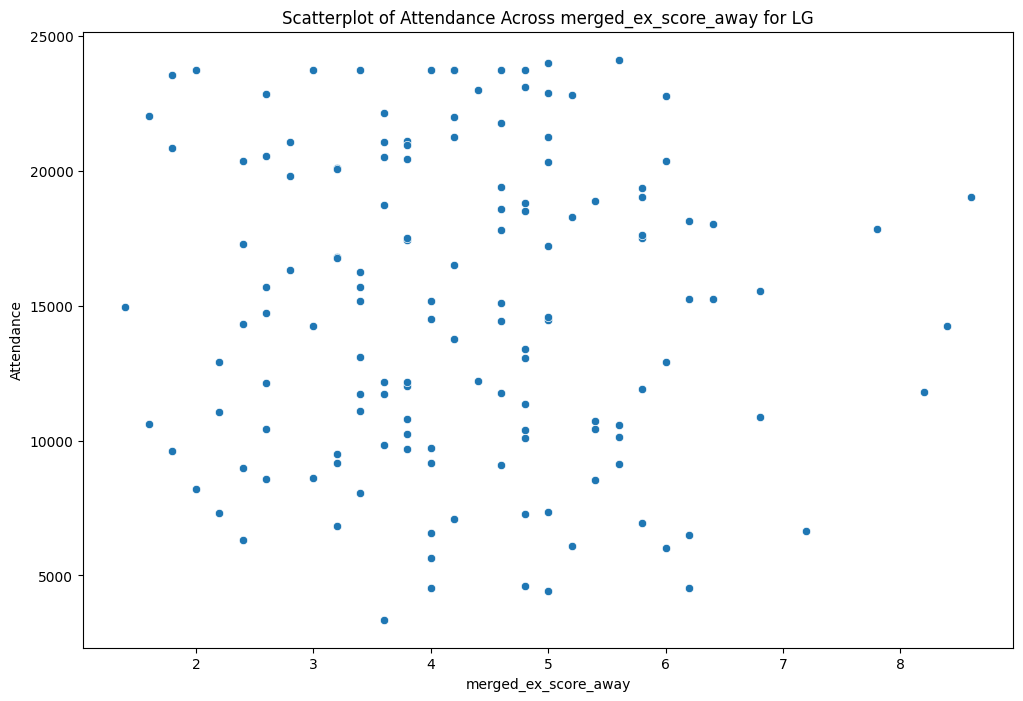

 
team : Lotte,
original rmse : 4127.771297693784
3game_results: -563.0521935696215
home_rank: -348.19279671561617
pythagorean_expectation: -321.29199750508997


/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/952030966.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_scores, x=features, palette="viridis")


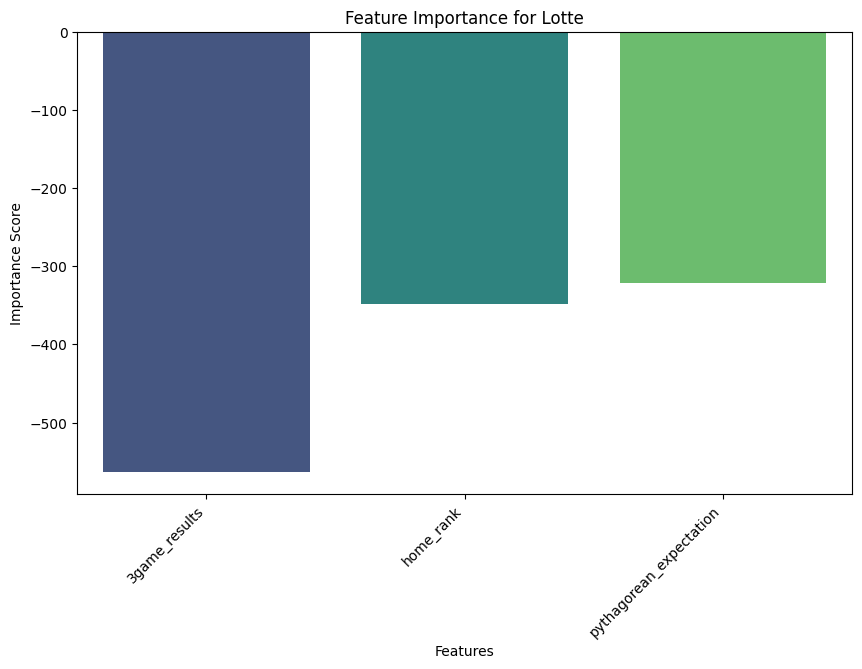

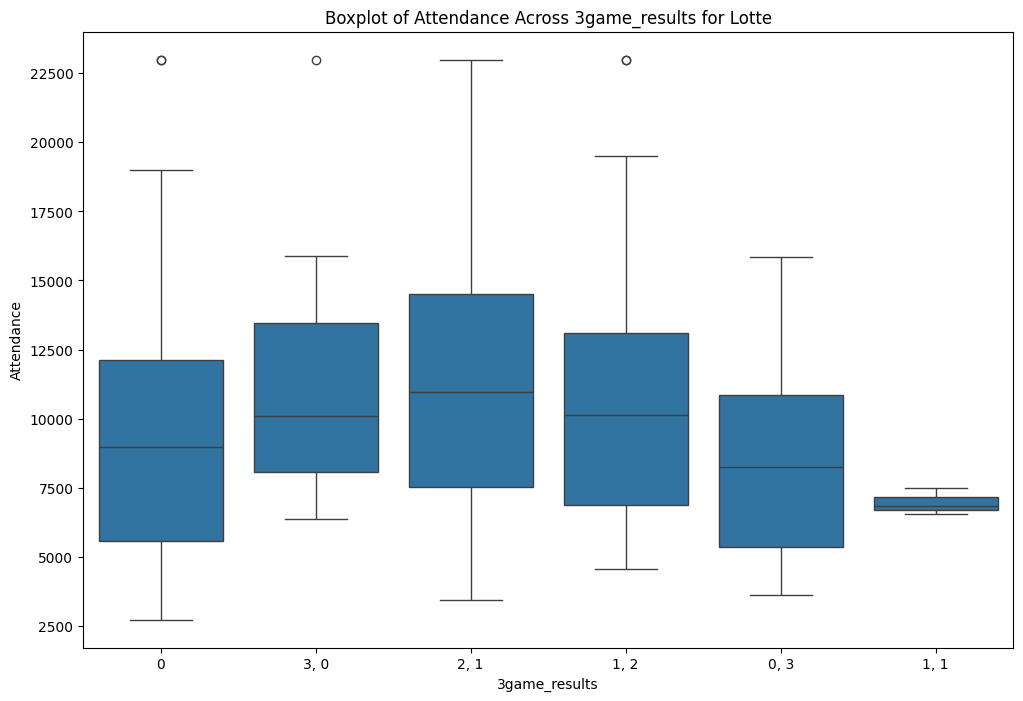

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


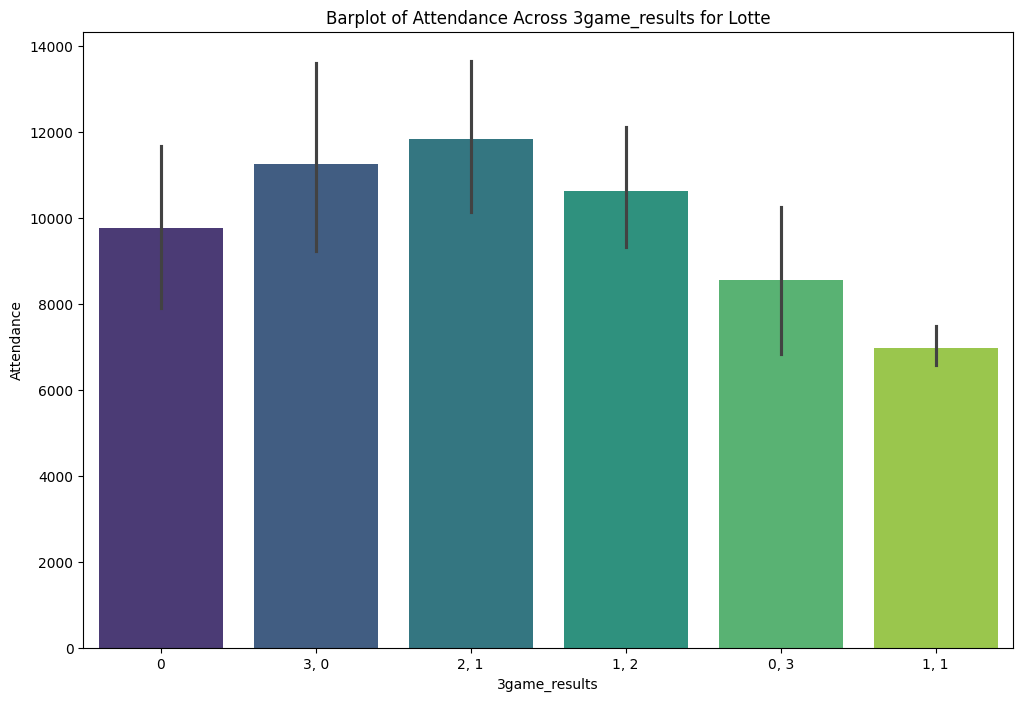

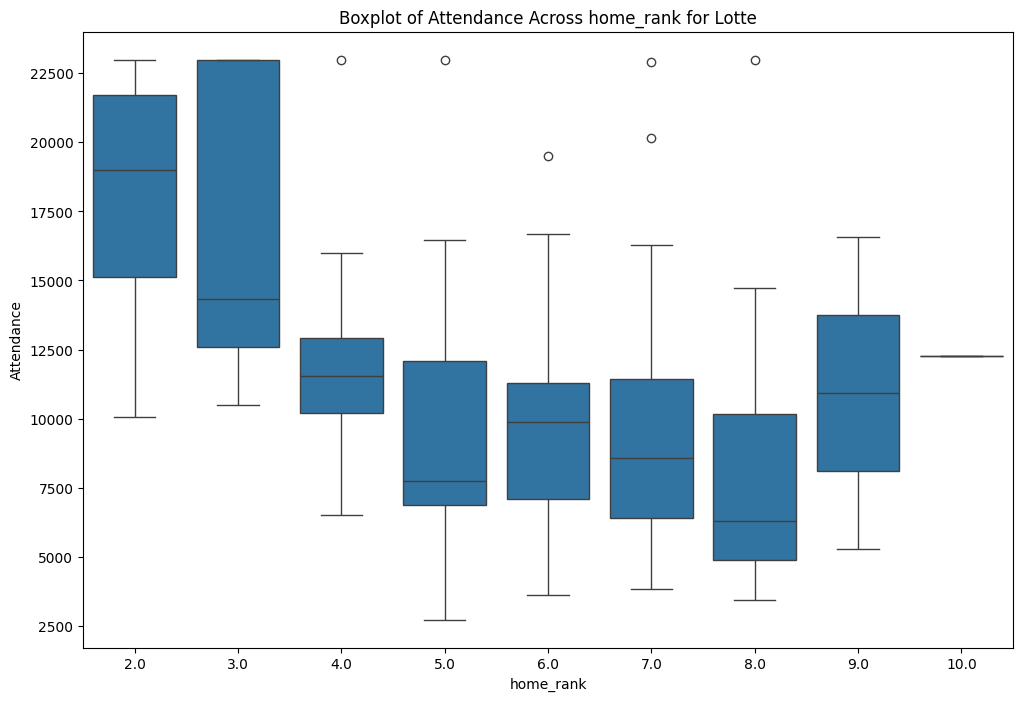

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


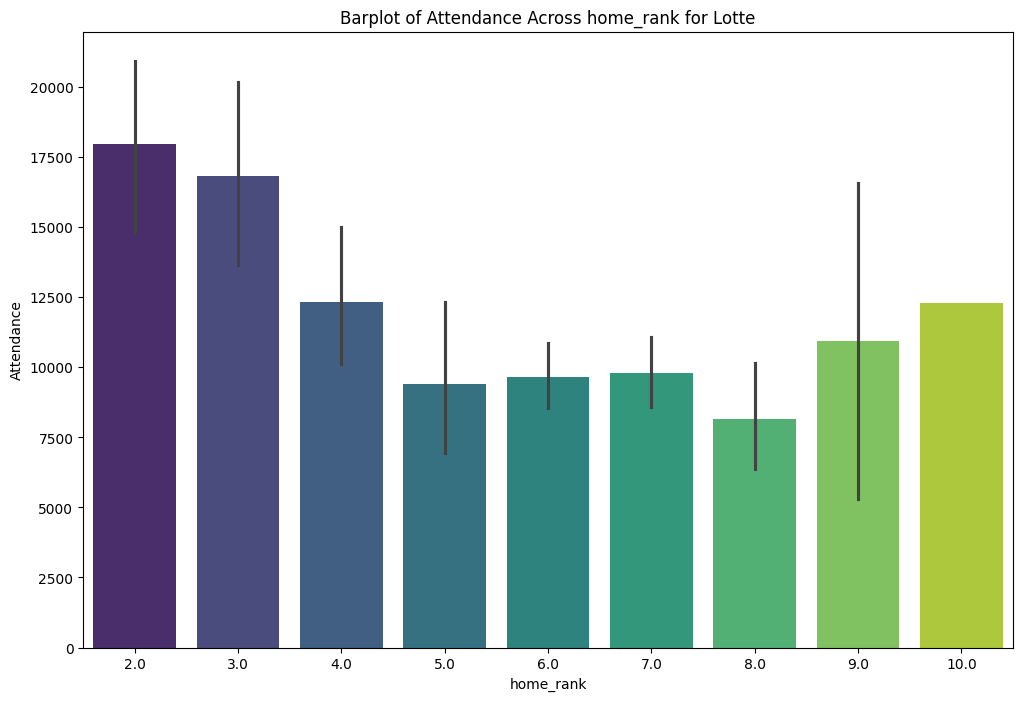

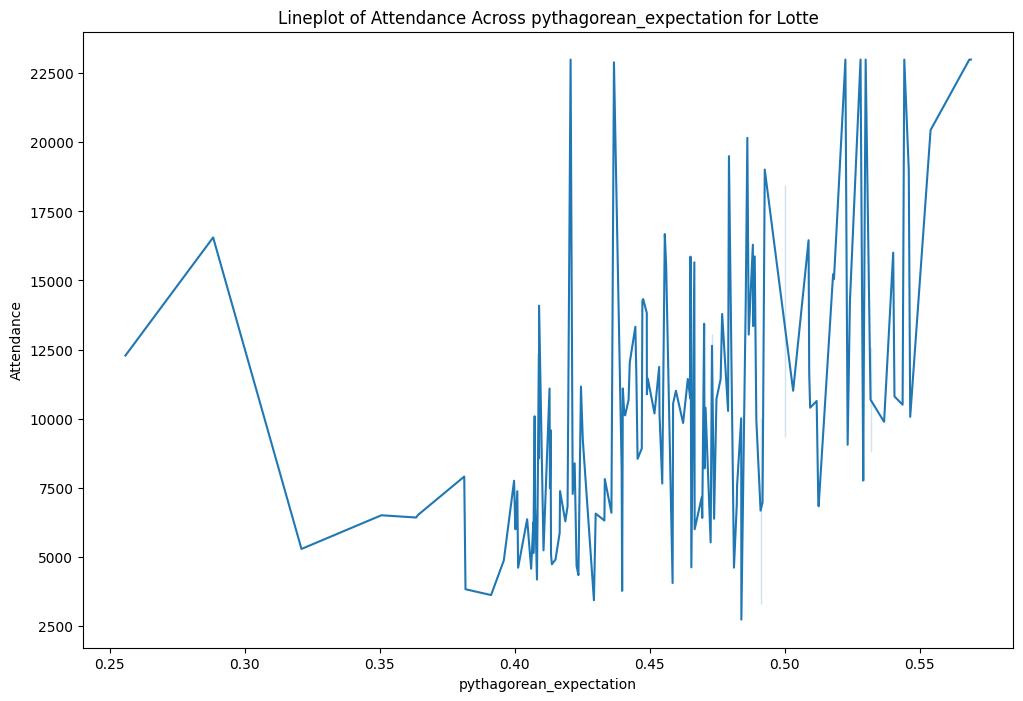

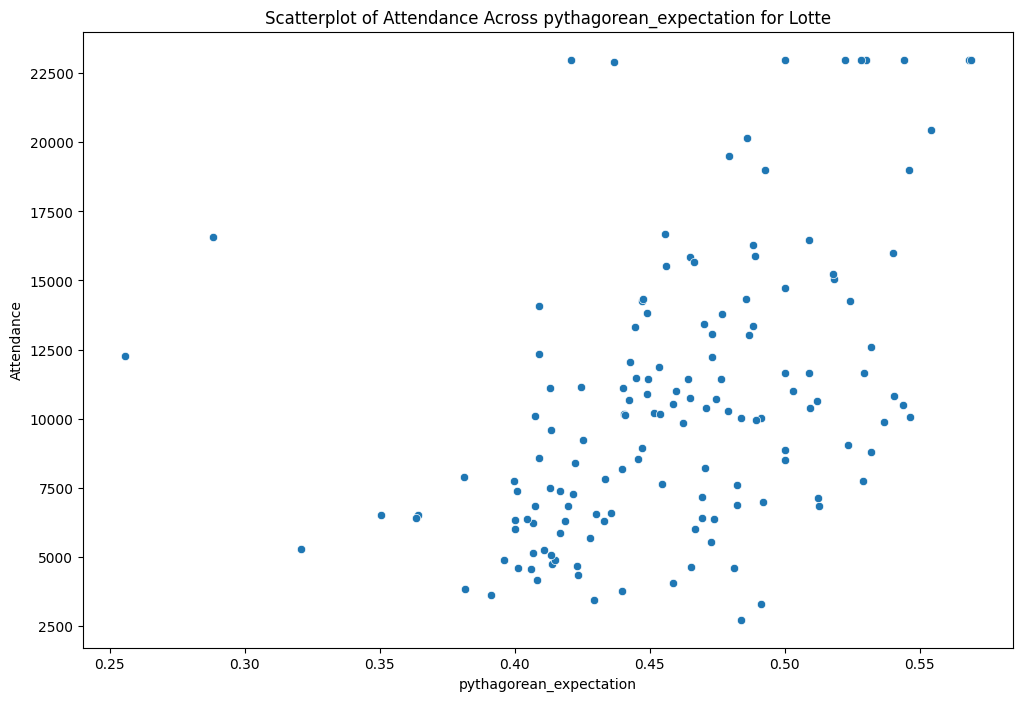

 
team : NC,
original rmse : 1698.7017509307009
away: -441.4046397209961
pythagorean_expectation: -306.73898337062724
time: -248.72229781212968


/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/952030966.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_scores, x=features, palette="viridis")


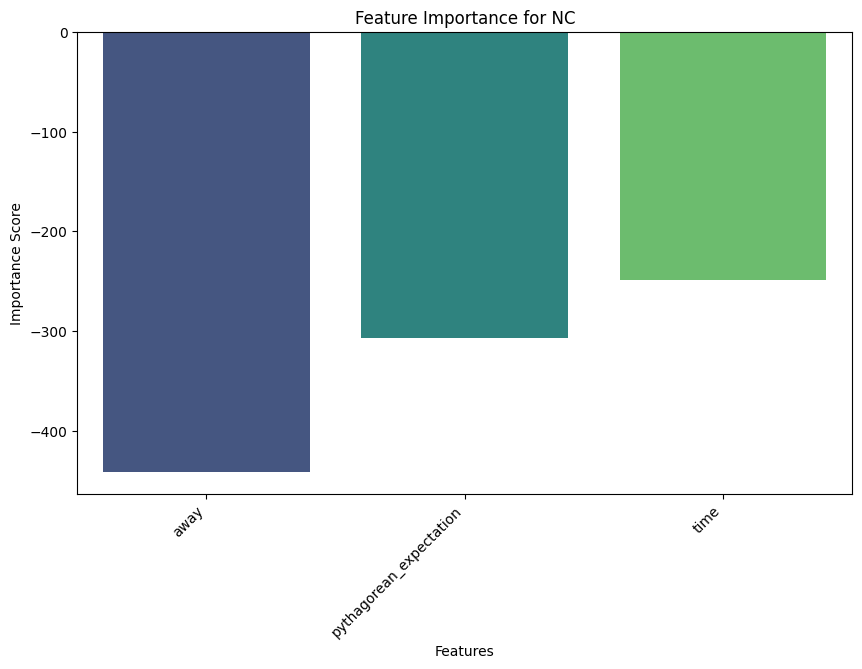

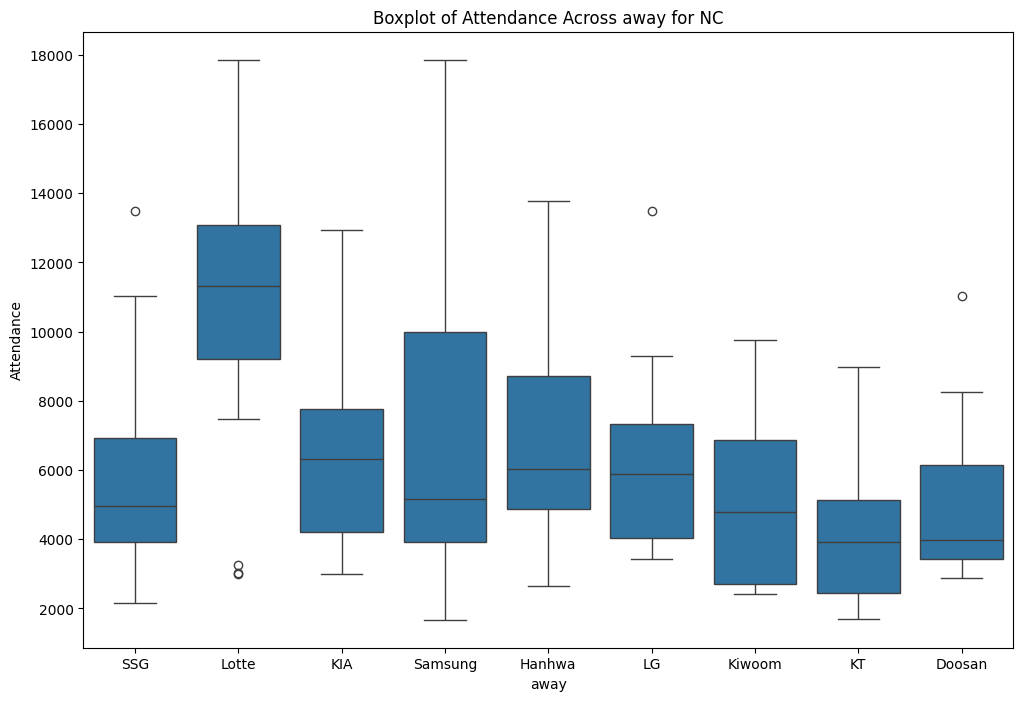

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


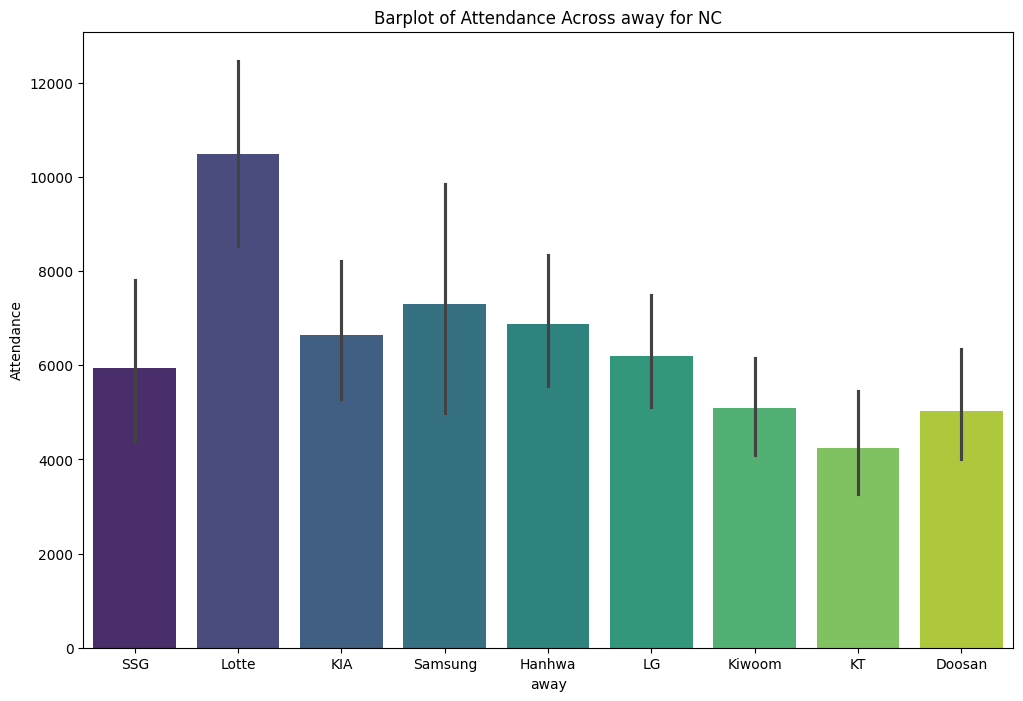

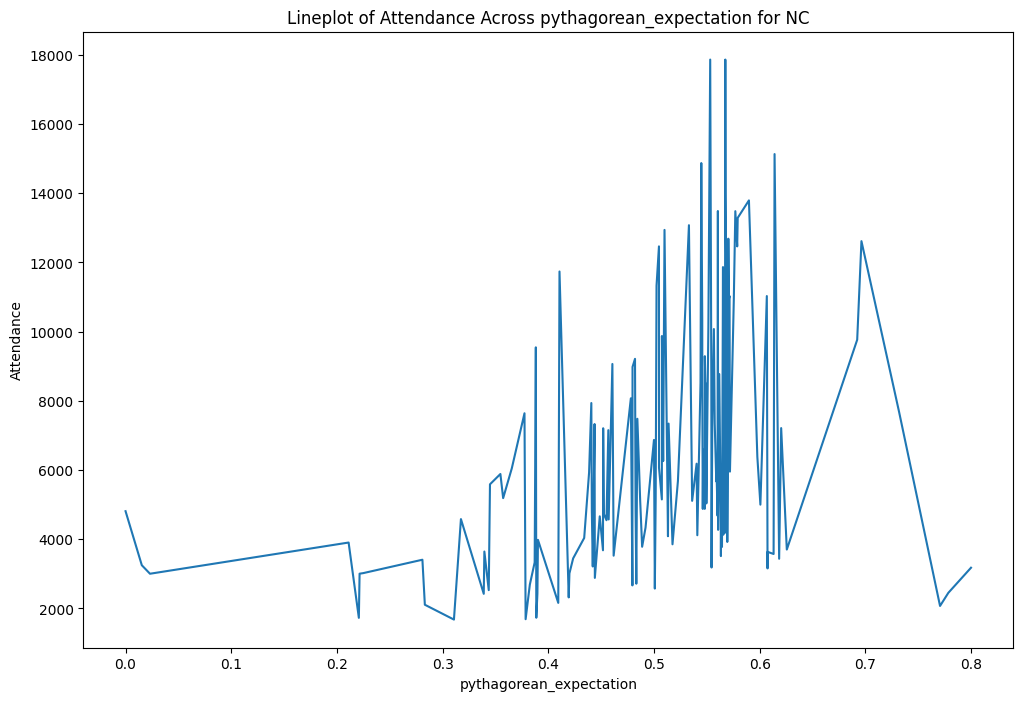

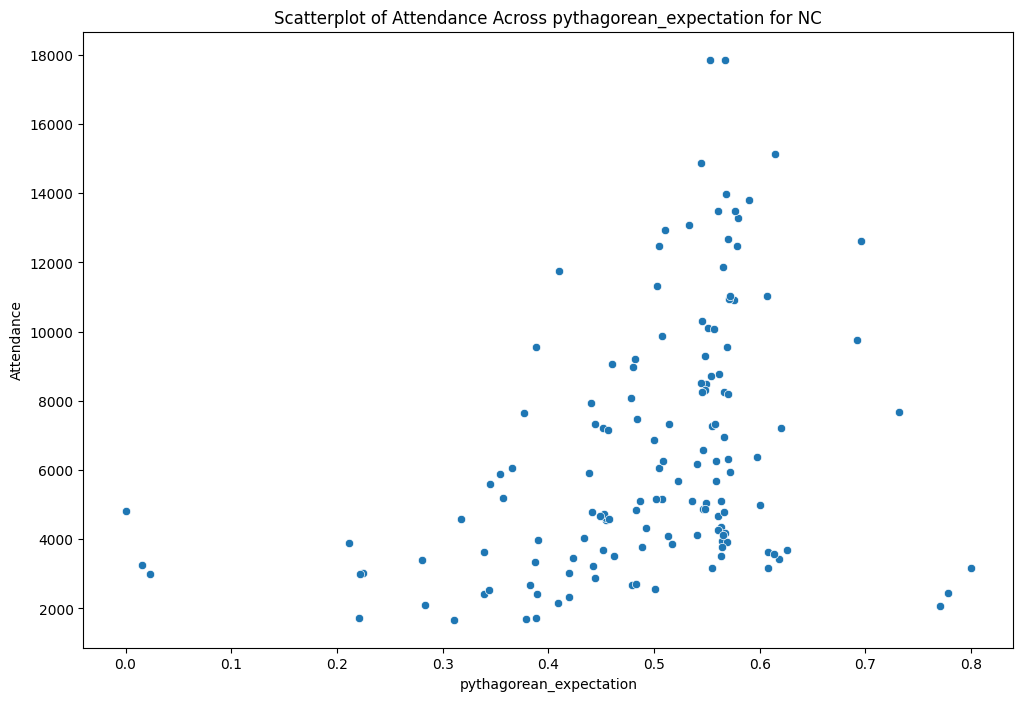

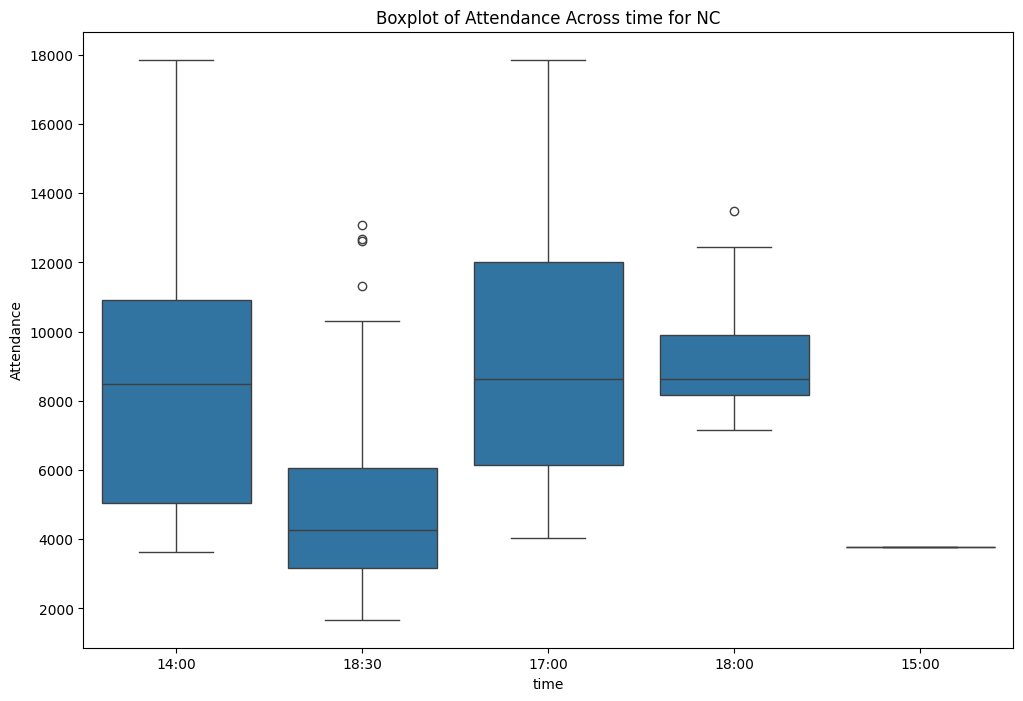

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


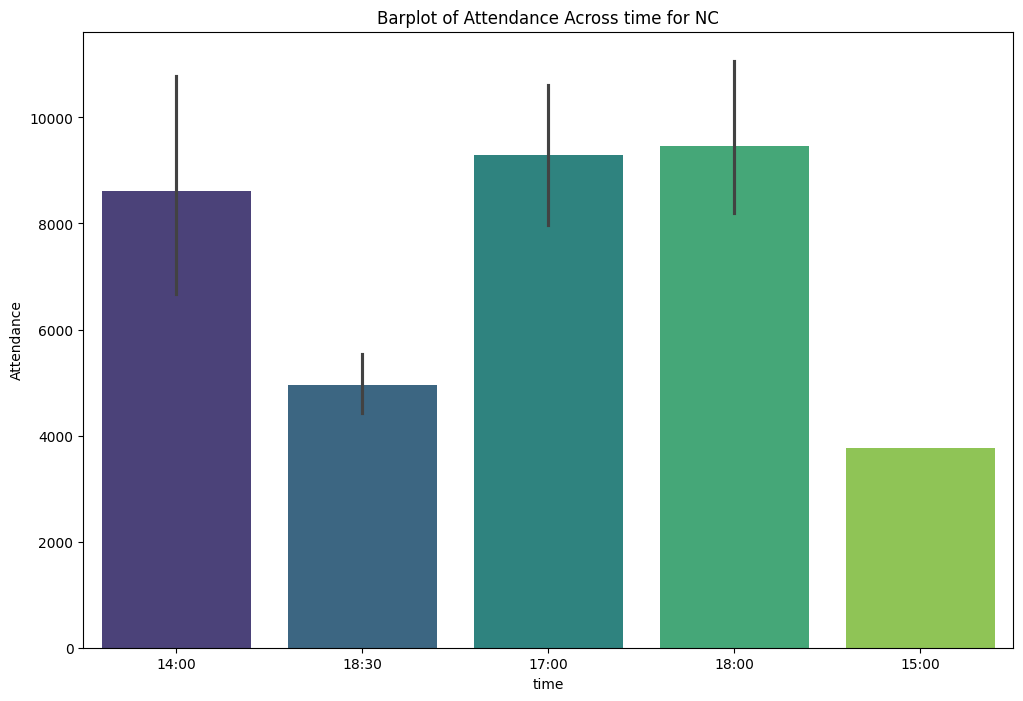

 
team : SSG,
original rmse : 3106457263829294.5
rain: -1.4833224812563682e+16
pythagorean_expectation: -1.0998266636151778e+16
last_match: -6186646132933780.0


/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/952030966.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_scores, x=features, palette="viridis")


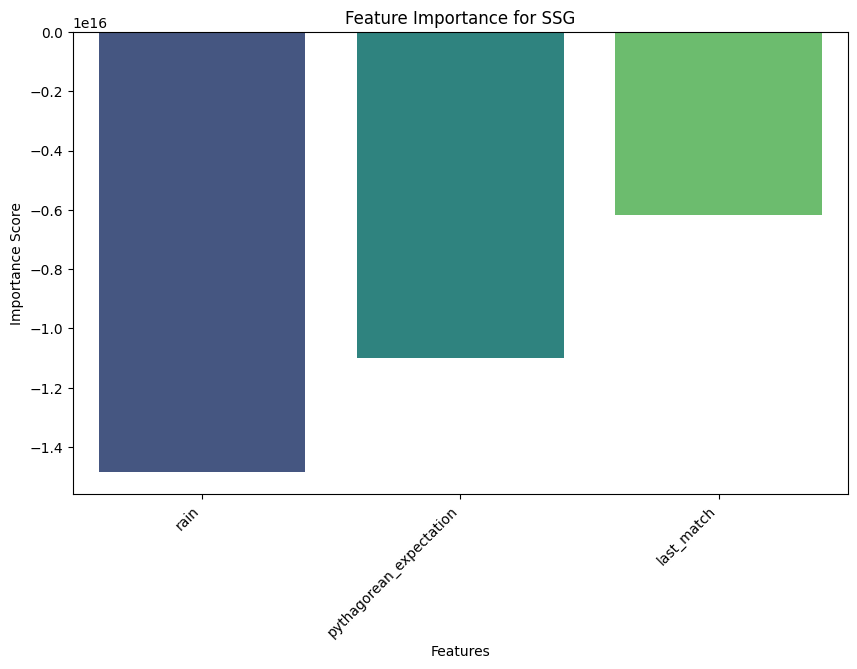

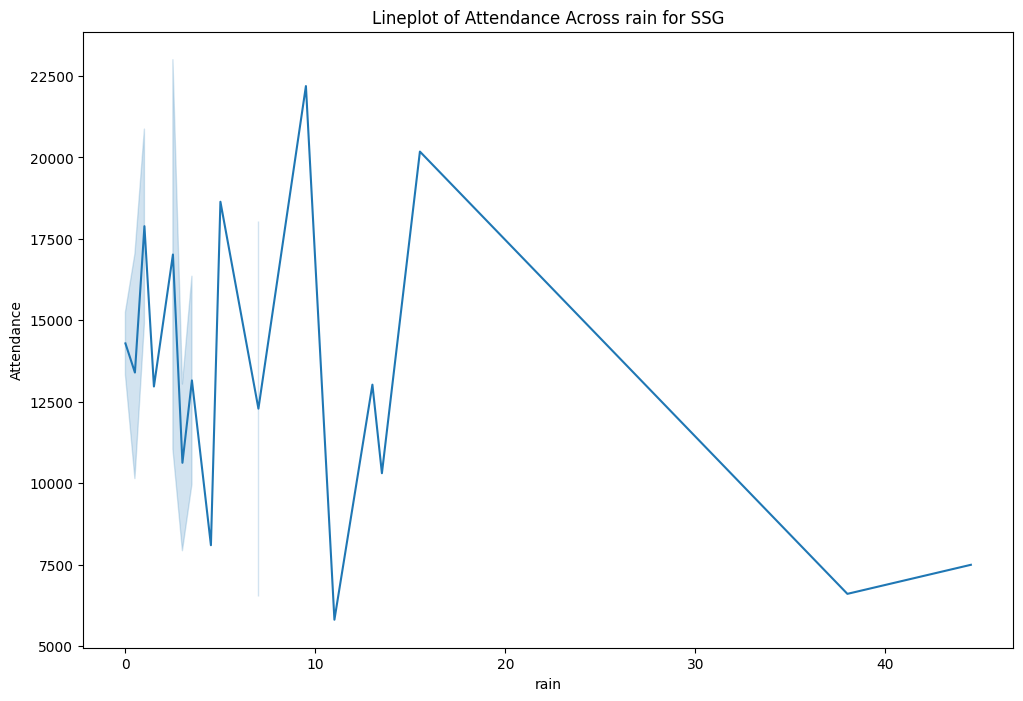

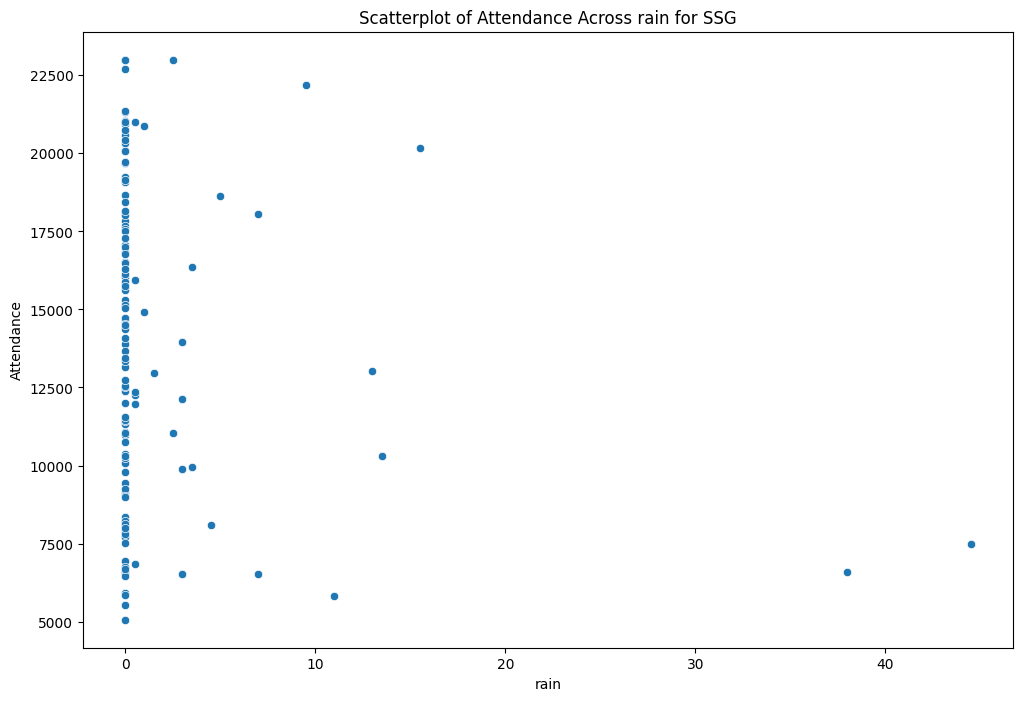

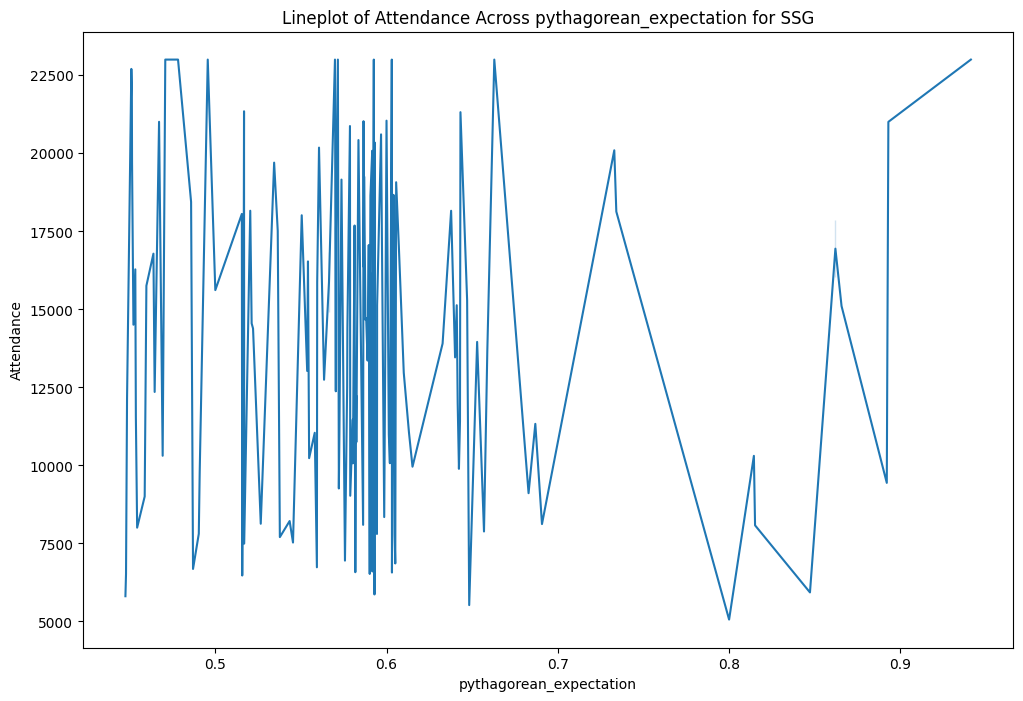

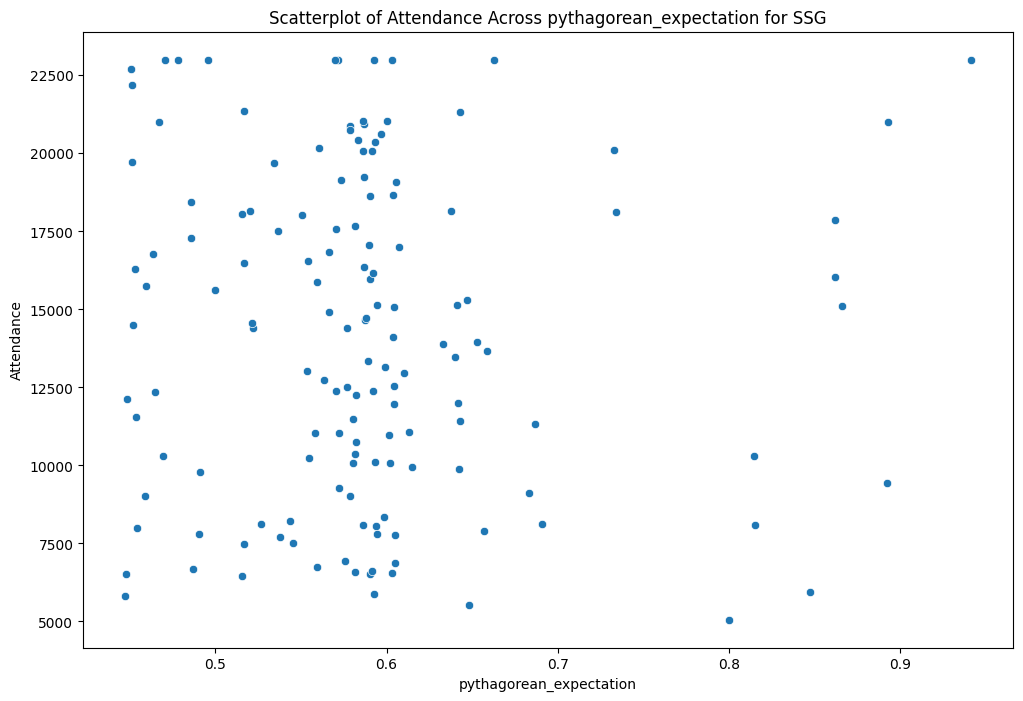

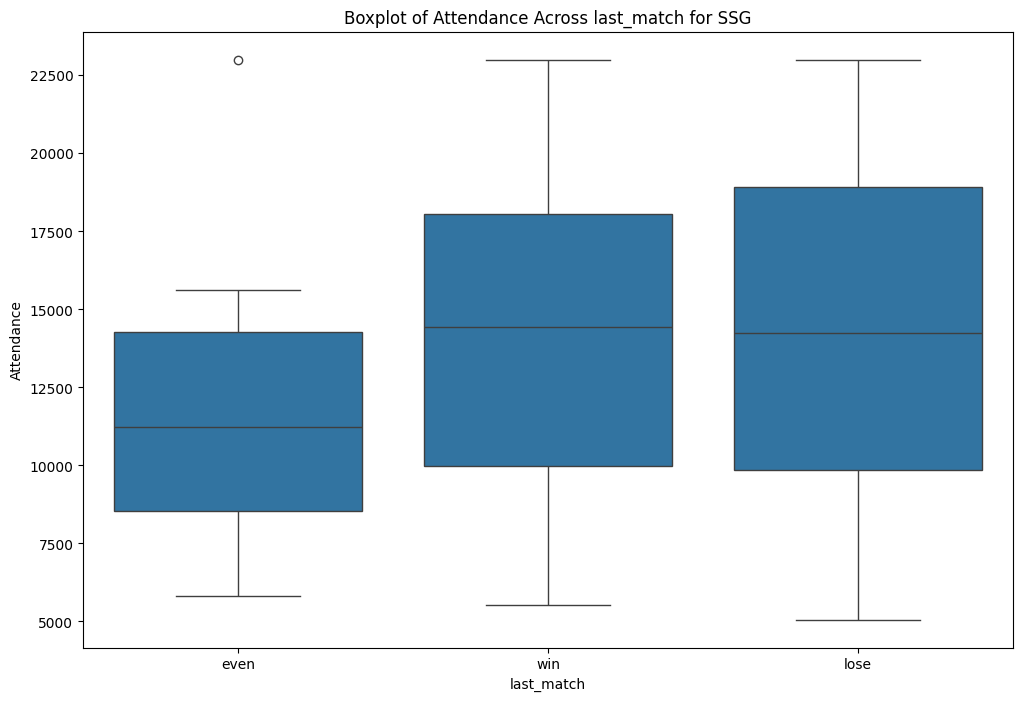

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


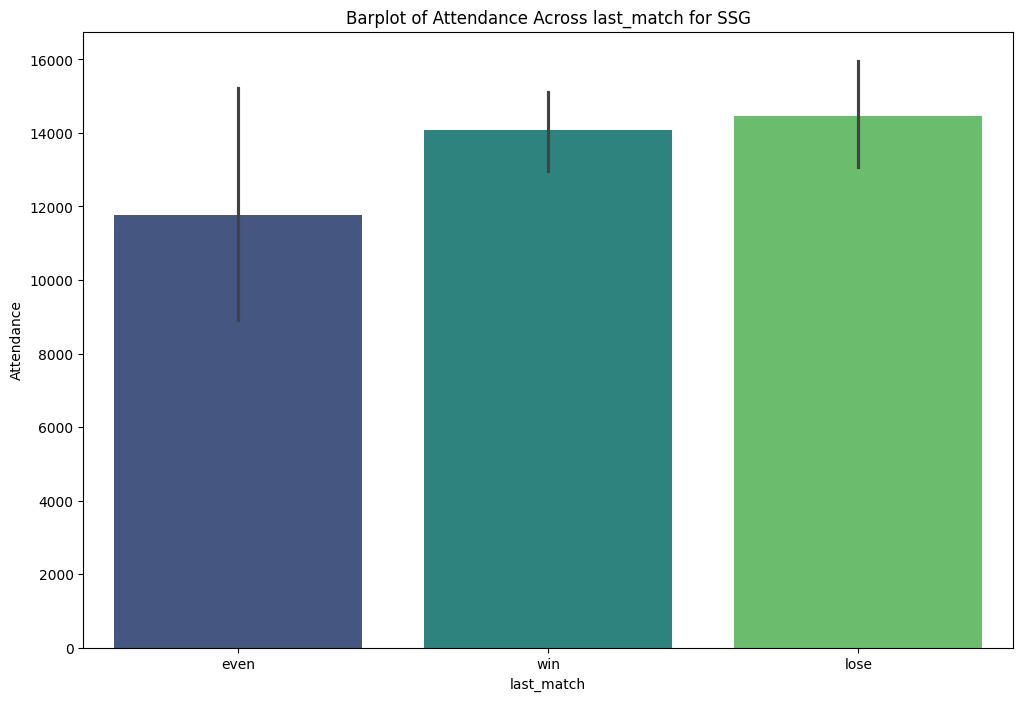

 
team : Samsung,
original rmse : 2581.27332703297
day: -684.0381661546076
year: -256.67019857592686
away_rank: -235.94309452785865


/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/952030966.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=importance_scores, x=features, palette="viridis")


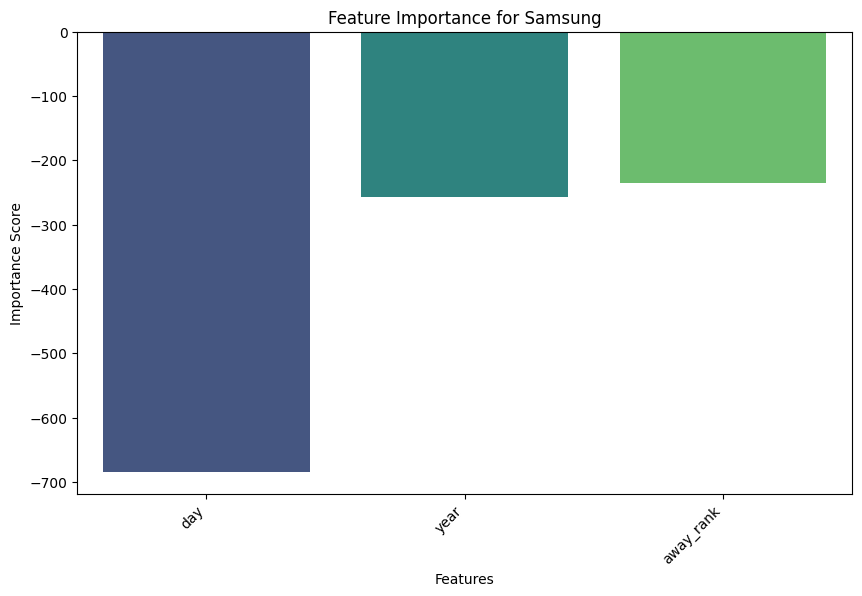

/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: U

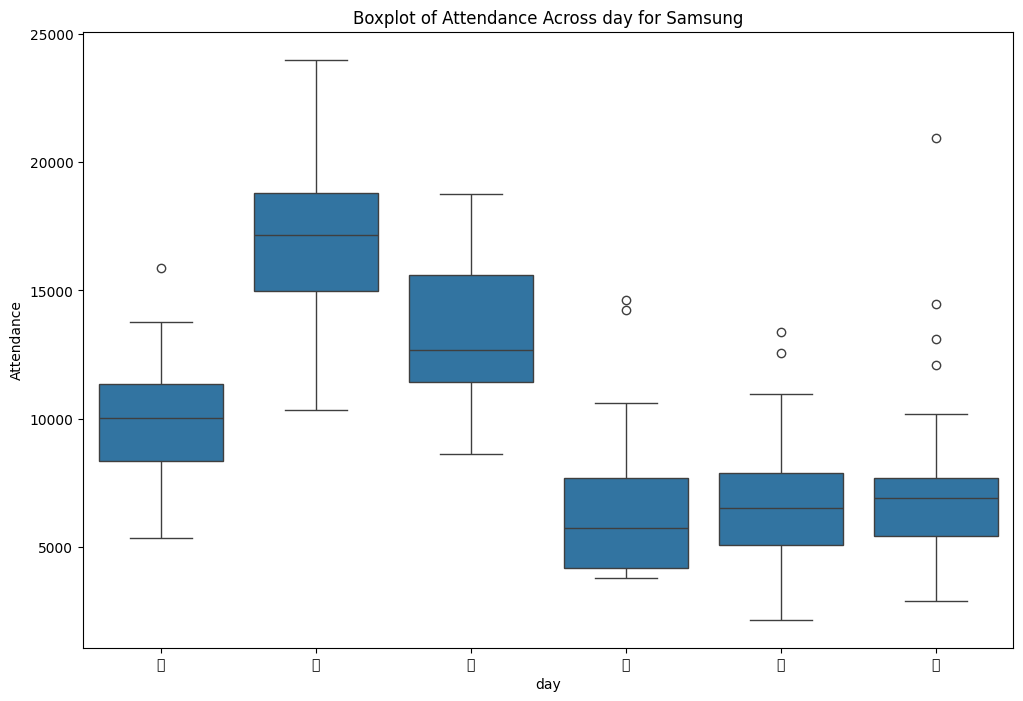

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sugang/Documents/kbo_attendance/venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


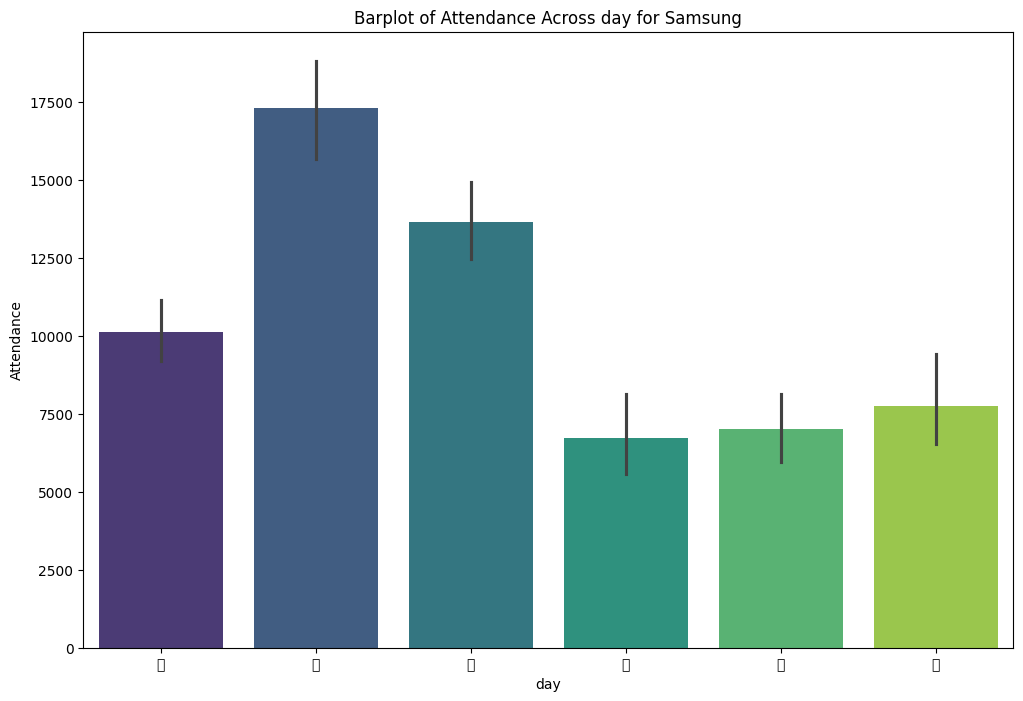

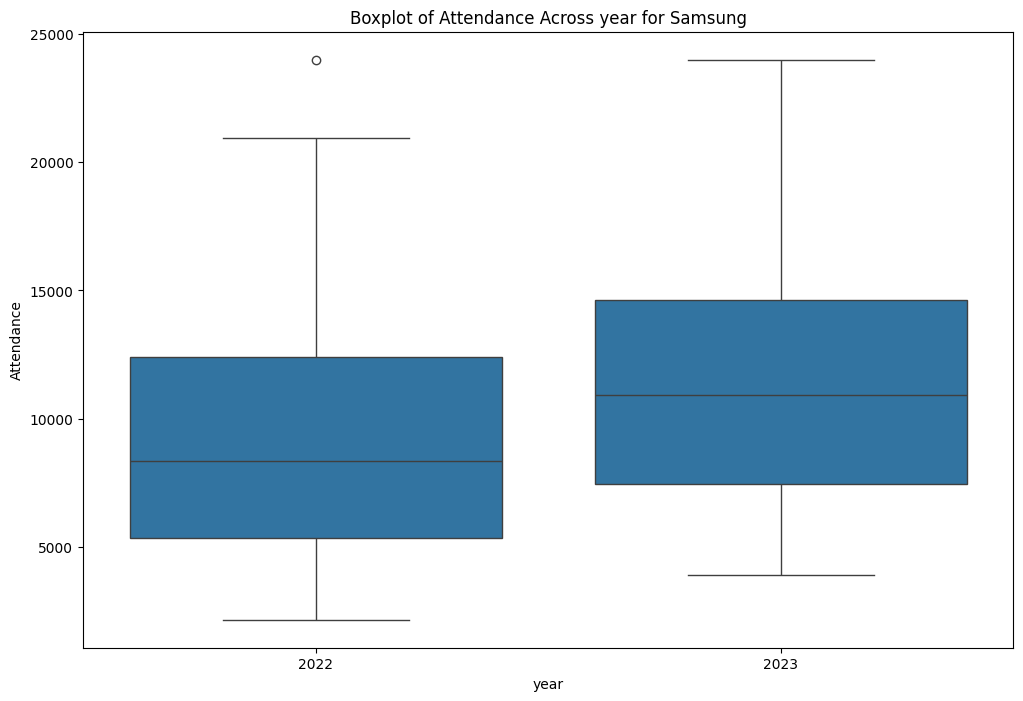

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


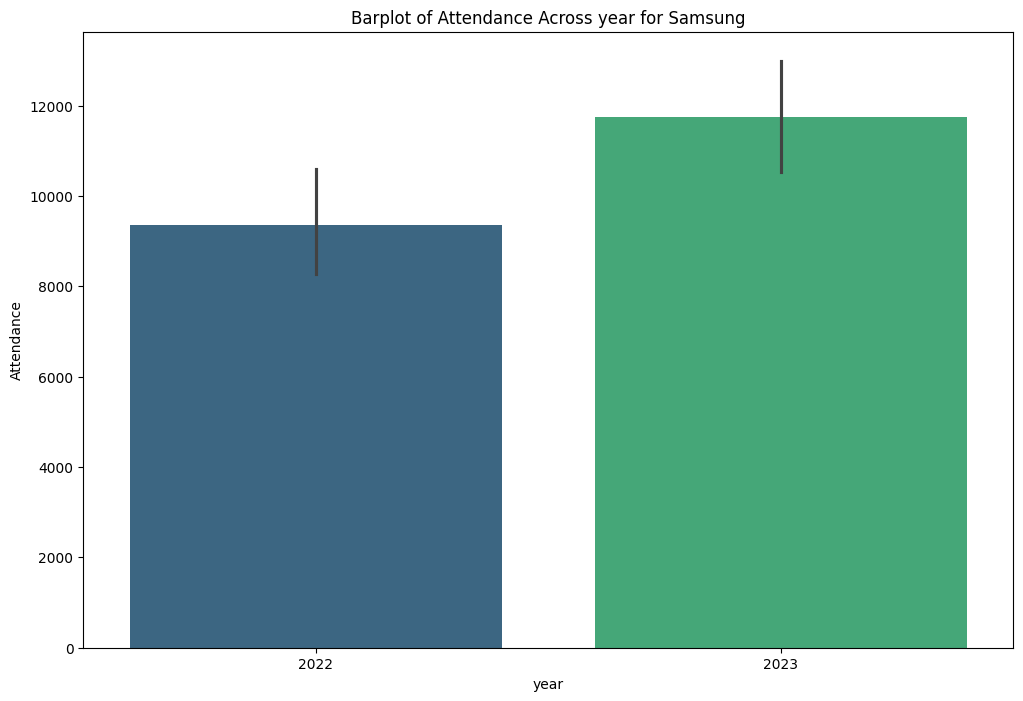

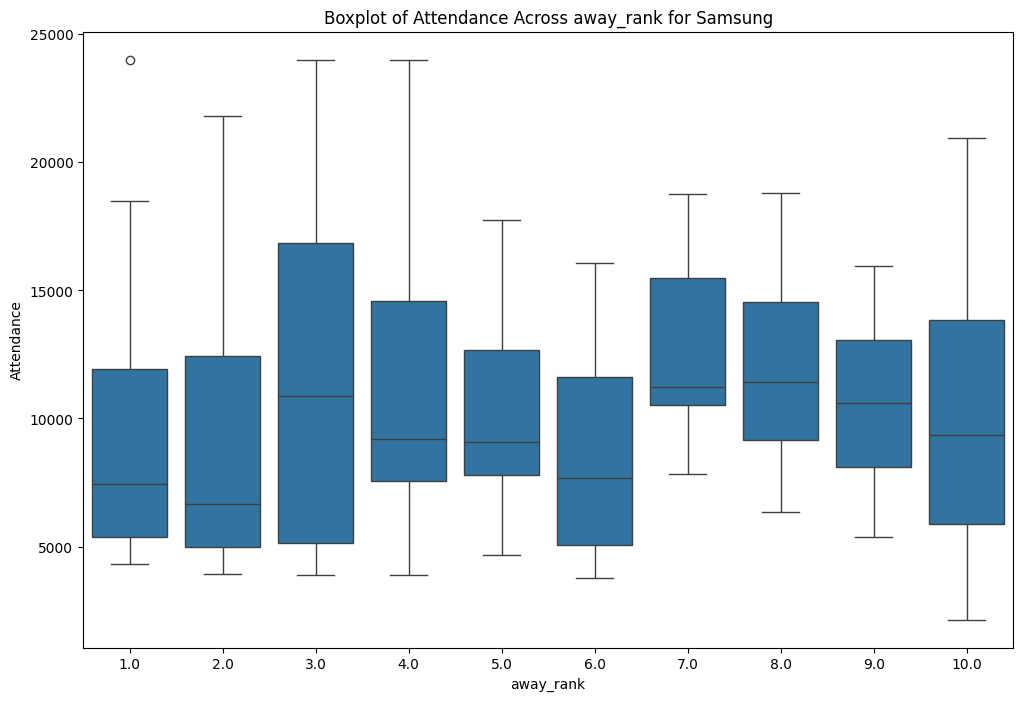

/var/folders/99/rgk848td545d3hdrkgrkw0t40000gn/T/ipykernel_38116/2862460165.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y='attendance', data=df, palette='viridis')


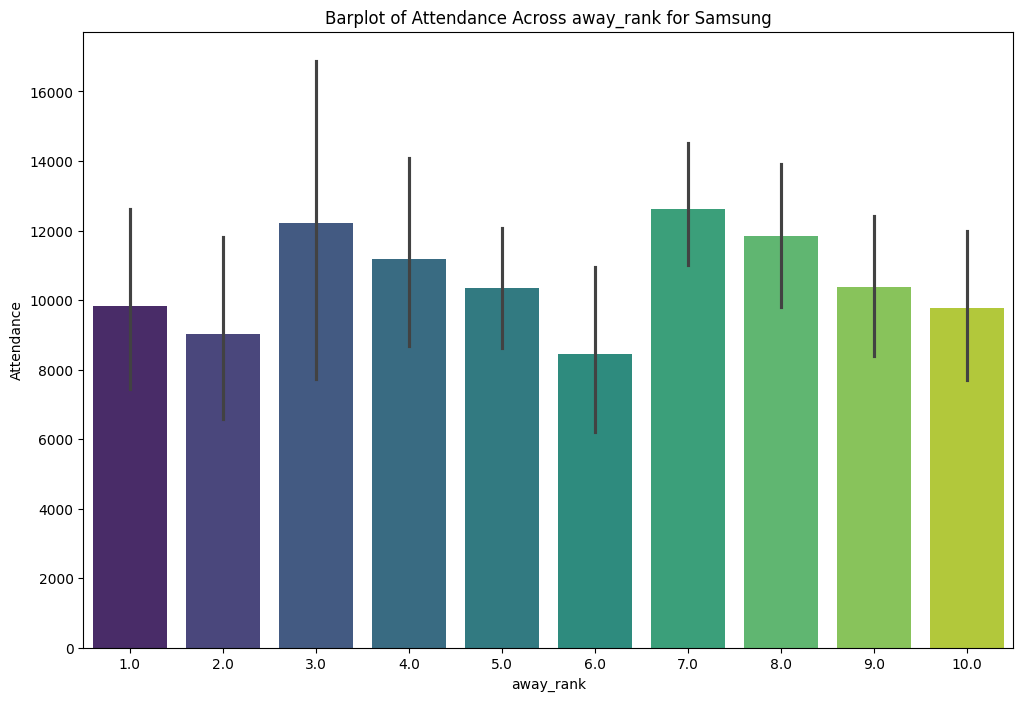

In [137]:
grouped = df.groupby('home')
for i in grouped:
    df_temp = i[1][total]
    original = get_result(df_temp)
    print(f'team : {i[0]},\noriginal rmse : {original}')
    dic2 = {}
    for l in dic:
        df_temp = i[1][dic[l]]
        new = get_result(df_temp)
        dic2[l] = original - new
    # Sorting the dictionary by values
    dic2 = dict(sorted(dic2.items(), key=lambda item: item[1]))

    # Displaying the sorted dictionary
    temp = 0
    temp_list1 = []
    temp_list2 = []
    for key, value in dic2.items():
        if temp < 5:
            print(f"{key}: {value}")
#             if abs(value) < 100000:
            temp_list1.append(key)
            temp_list2.append(value)
            temp+=1
        else:
            break
        temp+=1
    show(i[0], temp_list1, temp_list2)
    show_some(i[0], i[1], temp_list1[0])
    show_some(i[0], i[1], temp_list1[1])
    show_some(i[0], i[1], temp_list1[2])
#     show_box(i[0], i[1], temp_list1[1])
#     show_box(i[0], i[1], temp_list1[2])
    print(' ')
# def show_box(team, df, x):